# Intro
My name is Dor Strauss, I'm a software developer and computer science student passionate about AI and Data science.
I have experience in AI from my career and projects in the fields of LLM and computer vision, in this project to expand my knowledge and experience I have chosen a sub-field of Data Science I hadn't experienced in Time Series forecasting.
I have a deep interest in the stock market so it was natural for me to try to solve a problem from this field.

# The Problem
Let's start from the beginning, a stock represents a tiny part of a company, if a company is doing great financially its value goes up and its stock also goes up respectively.
ETF is a bit different from regular stock, an ETF (exchange-traded fund) is a pooled investment security that can be bought and sold like an individual stock. ETFs can be structured to track anything from the price of a commodity to a large and diverse collection of companies.

In the stock market, you can make money if you can predict what will be the price of a stock/ETF in the future, I will try to harness the power of AI to try to predict future stock prices, It's a very difficult task that many had tried to concur with mild success (if someone would have a model that can predict future stock prices he can hypothetically make infinite money!).
To tackle this challenge we will use various approaches from the time series forecasting field, a field that aims to predict the future value of something based on its historical values.


# The S&P 500
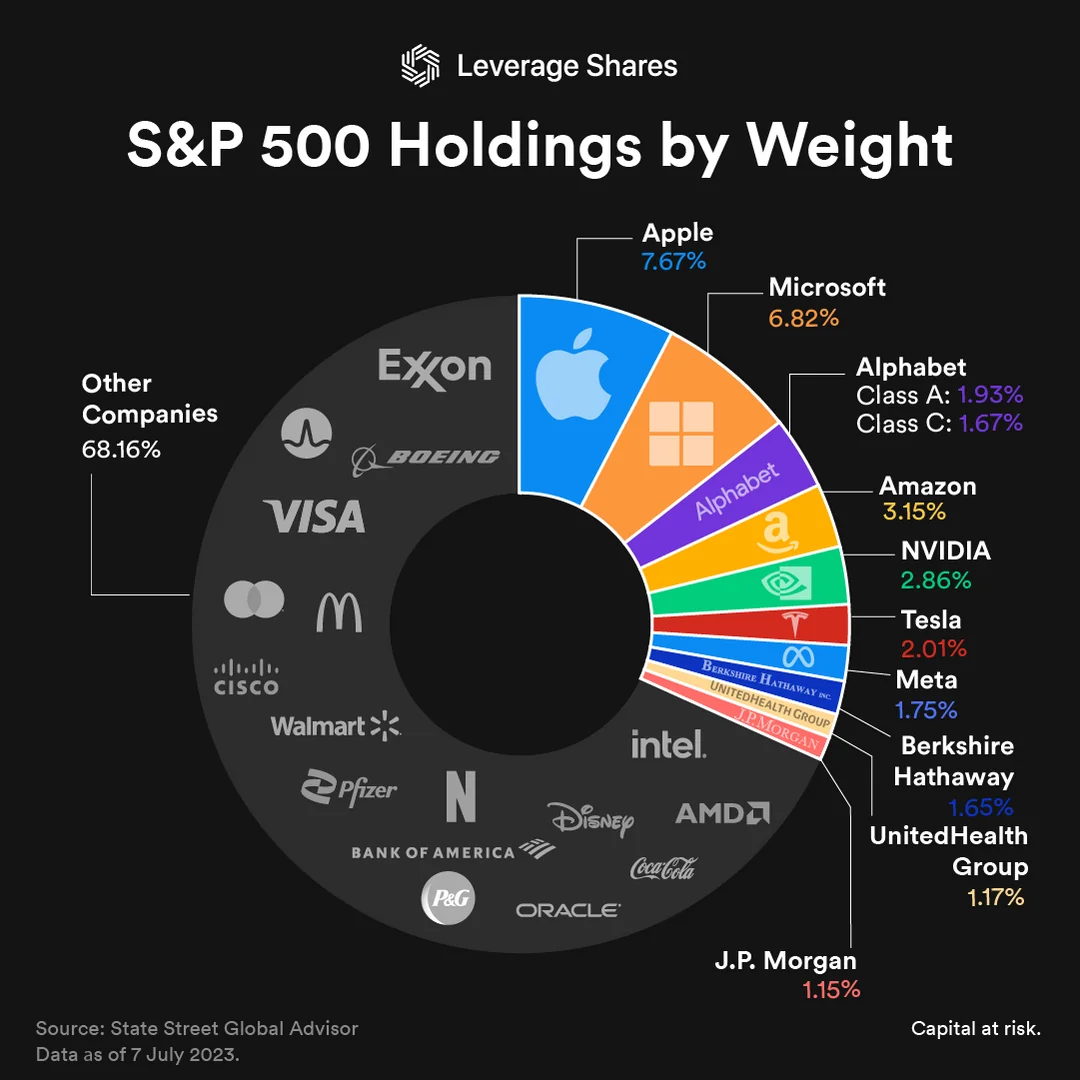
The S&P 500 is an index constructed by the 500 biggest and most successful companies in the US, it is viewed by many as a representation of the economy of the United States.
I have chosen the S&P 500 as the commodity I am trying to predict with my model.
The reason I chose an ETF over a single stock like Amazon for example is because a single stock is more prone to price fluctuations caused by financial statements or news about the company, a large index with 500 companies is more balanced and less volatile. To avoid these unpredictable price changes caused by news and financial reports, my model aims to predict the price of the S&P 500 at the end of the trading day, and the prediction itself is done at the beginning of the trading day, The advantage with this approach is that almost all the financial reports, news, and statements that can affect the s&p 500 price are announced prior to the trading open time or after the trading closing time, This way my model have all the historical data to this point and aim to predict the price a few hours ahead with no events in the middle that can cause changes in the price of the ETF.


# Technical Analysis
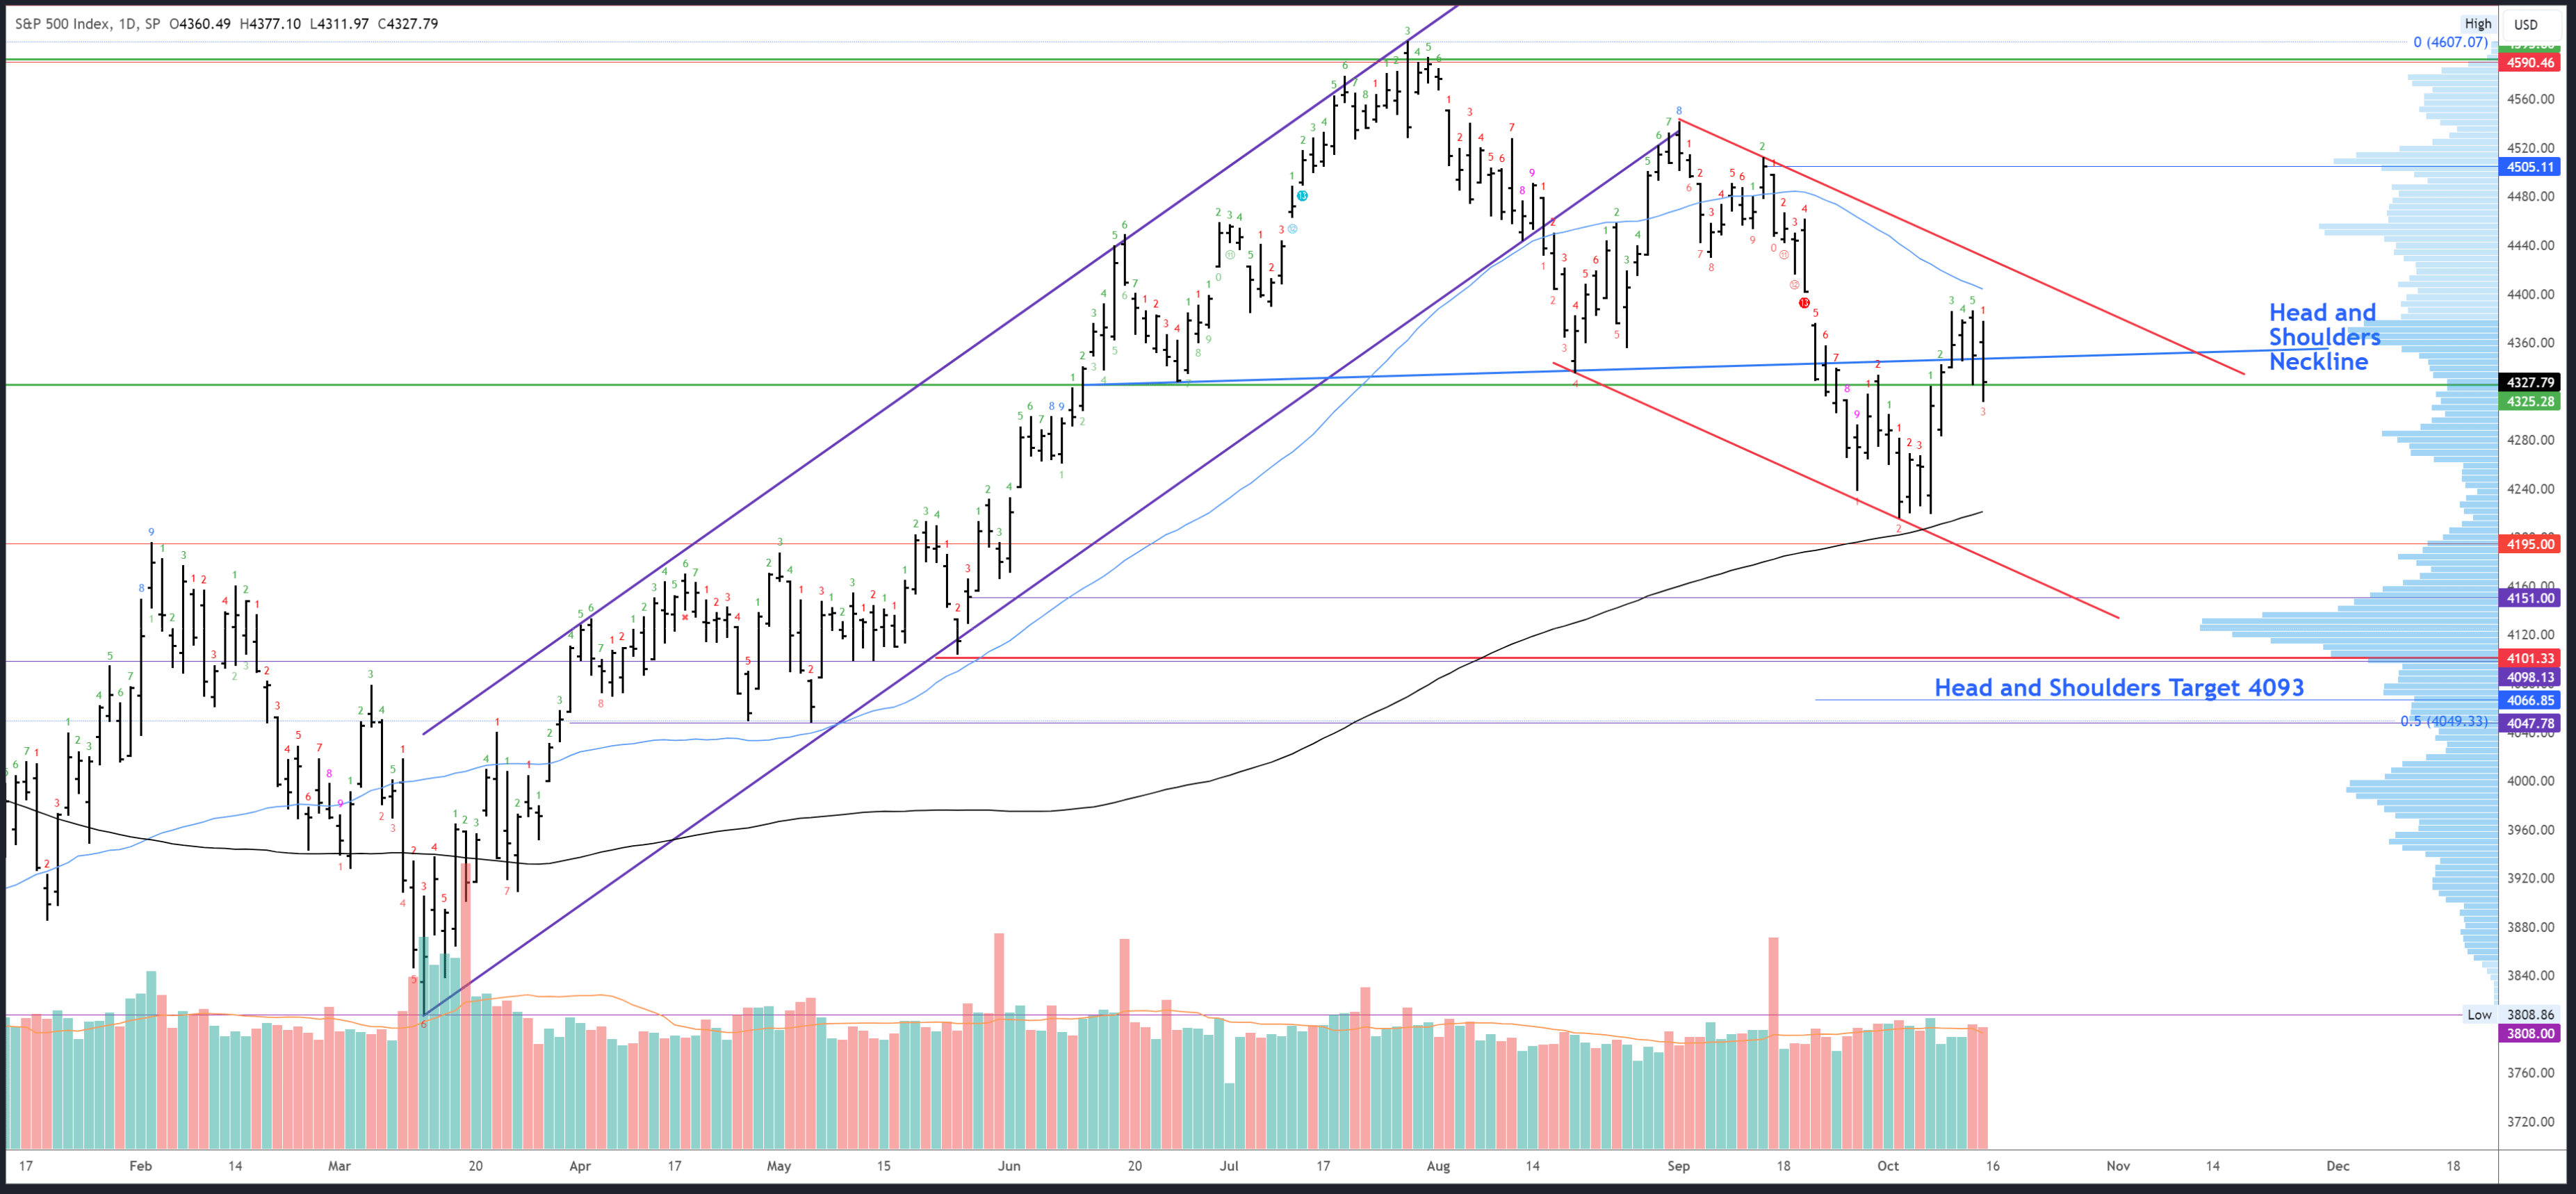
Technical analysis is the use of historical market data to predict future price movements. Using insights from market psychology, behavioral economics, and quantitative analysis, technical analysts aim to use past performance to predict future market behavior. The two most common forms of technical analysis are chart patterns and technical (statistical) indicators.

Many believe technical analysis is a very effective way to predict stock prices, on the other end many believe it's not effective at all.
I will try to put it to the test.
The traditional common ways of technical analysis are using the graph to understand the trend, And using moving averages and other indicators to predict the stock prices.
I will use several data science methods that also aim to predict the price by recognizing trends and other characteristics, but most of my focus is on deep learning models suitable for time series, their prediction is being processed in a bit different way than regular technical analysis, This is the places where AI can have a big advantage over human-like thinking and analysis because they can recognize connections to the stock price that we didn't think about.

# Collecting Data:
To create and train a model we need to have high-quality data on the SPY (the biggest ETF that tracks the S&P 500).

I have looked at several historical stock data providers and chose EODHD because they have accurate vast historical in different resolutions, and it's easy to collect the data using their API.

Each data point contains the time and date, the Open price, the highest price during the interval, the lowest price during the interval, the closing price, and the volume (how many shares were bought/sold during the interval).

After sending a request to the API I saved the raw data as Excel file in my Google Drive.

This is a [link](https://drive.google.com/file/d/1-4YVQs-wN8DgsduPIemg0cxNlp6qmTq9/view?usp=sharing) to the file with the SPY data we will be using to train and evaluate the model, feel free to download it and place it in the right location to be able to run the code cells.

In [ ]:
# connecting to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import os

#creating the folders in google drive where we will save the historical data
google_drive_project_root_path = '/content/drive/MyDrive/Dor/The Open University/Data Science Project'
stocks_historical_data_folder_in_drive = os.path.join(
    google_drive_project_root_path, 'stocks historical data')
spy_historical_data_dir = os.path.join(stocks_historical_data_folder_in_drive,
                                       'SPY')
os.makedirs(spy_historical_data_dir, exist_ok=True)
qqq_historical_data_dir = os.path.join(stocks_historical_data_folder_in_drive,
                                       'QQQ')
os.makedirs(qqq_historical_data_dir, exist_ok=True)

API_TOKEN = '65da3016af22f4.27528301'

interval = '5m'
symbol = 'SPY.US'
format = 'csv'

from_to_unix = [
    # ['1262296800', '1293832799', '2010'], # 2010
    # ['1293832800', '1325368799', '2011'], # 2011
    # ['1325368800', '1356991199', '2012'], # 2012
    # ['1356991200', '1388527199', '2013'], # 2013
    # ['1388527200', '1388527199', '2014'], # 2014
    # ['1420063200', '1451599199', '2015'], # 2015
    # ['1451599200', '1483221599', '2016'], # 2016
    # ['1483221600', '1514757599', '2017'], # 2017
    # ['1514757600', '1546293599', '2018'], # 2018
    # ['1546293600', '1577829599', '2019'], # 2019
    # ['1577829600', '1609451999', '2020'], # 2020
    # ['1609452000', '1640987999', '2021'], # 2021
    # ['1640988000', '1672523999', '2022'], # 2022
    # ['1672524000', '1704059999', '2023'], # 2023
    ['1704060000', '1711216216', '1-1-2024 23-03-2024'], # 2024
]
# from_to_unix = [
#     ['1262296800', '', '1-1-2010 30-4-2010'], # 2010
#     ['', '', '1-5-2010 31-8-2010'], # 2010
#     ['', '', '1-9-2010 31-12-2010'], # 2010
#     ['1293832800', '', '1-1-2011 30-4-2011'], # 2011
#     ['', '', '1-5-2011 31-8-2011'], # 2011
#     ['', '', '1-9-2011 31-12-2011'], # 2011
#     ['1325368800', '', '1-1-2012 30-4-2012'], # 2012
#     ['', '', '1-5-2012 31-8-2012'], # 2012
#     ['', '', '1-9-2012 31-12-2012'], # 2012
#     ['1356991200', '', '1-1-2013 30-4-2013'], # 2013
#     ['', '', '1-5-2013 31-8-2013'], # 2013
#     ['', '', '1-9-2013 31-12-2013'], # 2013
#     ['1388527200', '', '1-1-2014 30-4-2014'], # 2014
#     ['', '', '1-5-2014 31-8-2014'], # 2014
#     ['', '', '1-9-2014 31-12-2014'], # 2014
#     ['1420063200', '', '1-1-2015 30-4-2015'], # 2015
#     ['', '', '1-5-2015 31-8-2015'], # 2015
#     ['', '', '1-9-2015 31-12-2015'], # 2015
#     ['1451599200', '', '1-1-2016 30-4-2016'], # 2016
#     ['', '', '1-5-2016 31-8-2016'], # 2016
#     ['', '', '1-9-2016 31-12-2016'], # 2016
#     ['1483221600', '', '1-1-2017 30-4-2017'], # 2017
#     ['', '', '1-5-2017 31-8-2017'], # 2017
#     ['', '', '1-9-2017 31-12-2017'], # 2017
#     ['1514757600', '', '1-1-2018 30-4-2018'], # 2018
#     ['', '', '1-5-2018 31-8-2018'], # 2018
#     ['', '', '1-9-2018 31-12-2018'], # 2018
#     ['1546293600', '', '1-1-2019 30-4-2019'], # 2019
#     ['', '', '1-5-2019 31-8-2019'], # 2019
#     ['', '', '1-9-2019 31-12-2019'], # 2019
#     ['1577829600', '', '1-1-2020 30-4-2020'], # 2020
#     ['', '', '1-5-2020 31-8-2020'], # 2020
#     ['', '', '1-9-2020 31-12-2020'], # 2020
# ]

for year_data in from_to_unix:

  from_datetime_in_unix = year_data[0]
  until_datetime_in_unix = year_data[1]
  time_range = year_data[2]

  url = f'https://eodhd.com/api/intraday/{symbol}?interval={interval}&api_token={API_TOKEN}&fmt={format}&from={from_datetime_in_unix}&to={until_datetime_in_unix}'
  response = requests.get(url)
  data = response.content

  file_name=f'SPY data 5-min {time_range}.csv'
  file_path = os.path.join(spy_historical_data_dir, file_name)

  with open(file_path, 'wb') as f:
      f.write(data)

In [ ]:
import requests
import json
import time
from datetime import datetime, timedelta
import pytz
import os

symbol = 'SPY.US'
format = 'csv'
api_url = f'https://eodhd.com/api/intraday/{symbol}'
API_TOKEN = '65da3016af22f4.27528301'

# Define the New York timezone
new_york_timezone = pytz.timezone('America/New_York')

# Function to convert datetime to New York Unix timestamp
def datetime_to_unix_timestamp(dt):
    return int(dt.timestamp())

# Function to send API request and save response to a file
def send_api_request_and_save_response(start_time, end_time, file_name):
    # Convert start and end time to New York timezone
    start_time = start_time + timedelta(hours=5)
    end_time = end_time + timedelta(hours=5)

    # Convert start and end time to Unix timestamp
    start_timestamp = datetime_to_unix_timestamp(start_time)
    end_timestamp = datetime_to_unix_timestamp(end_time)

    # Prepare API request parameters
    params = {
        "api_token": API_TOKEN,
        "from": start_timestamp,
        "to": end_timestamp,
        "interval": "1m",  # 1 minute intervals
        "fmt": "csv"
    }

    # Send API request
    print(params)
    response = requests.get(api_url, params=params)

    # Save response to a file
    with open(file_name, 'wb') as f:
        f.write(response.content)

# Iterate over each time range and send API requests
for year in range(2021, 2024):

  # Define the time range for each request
  time_ranges = [
      (f"{year}-01-01 00:00:00", f"{year}-03-31 23:59:59"),
      (f"{year}-04-01 00:00:00", f"{year}-06-30 23:59:59"),
      (f"{year}-07-01 00:00:00", f"{year}-09-30 23:59:59"),
      (f"{year}-10-01 00:00:00", f"{year}-12-31 23:59:59"),
  ]
  for idx, (start_str, end_str) in enumerate(time_ranges, start=1):
      # Parse start and end time strings to datetime objects
      start_time = datetime.strptime(start_str, "%Y-%m-%d %H:%M:%S")
      end_time = datetime.strptime(end_str, "%Y-%m-%d %H:%M:%S")

      # Create a file name based on the time range
      file_name = f"SPY_1min_{start_time.strftime('%Y-%m-%d')}_{end_time.strftime('%Y-%m-%d')}.csv"
      google_drive_path = '/content/drive/MyDrive/Dor/The Open University/Operating systems/Data Science Project/stocks historical data/SPY'
      save_dir = os.path.join(google_drive_path, file_name)

      # Send API request and save response to a file
      send_api_request_and_save_response(start_time, end_time, save_dir)

      # Wait for a few seconds between requests to avoid rate limiting
      if idx < len(time_ranges):
          time.sleep(2)

print("API requests completed and responses saved to files.")


{'api_token': '65da3016af22f4.27528301', 'from': 1609477200, 'to': 1617249599, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1617249600, 'to': 1625111999, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1625112000, 'to': 1633060799, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1633060800, 'to': 1641013199, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1641013200, 'to': 1648785599, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1648785600, 'to': 1656647999, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1656648000, 'to': 1664596799, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1664596800, 'to': 1672549199, 'interval': '1m', 'fmt': 'csv'}
{'api_token': '65da3016af22f4.27528301', 'from': 1672549200, 'to': 1680321599, 'interval': '1m', 'fmt': 'csv'}
{

# Preparing the data:
We will aggragate the data to 1-hour and 1-day for the EDA we will do on it.

In [ ]:
import pdb
import pandas as pd


def aggragate_file_data(file_path: str, pandas_frequency: str):
  if pandas_frequency != '1H' and pandas_frequency != '1D' and pandas_frequency != '5M':
    print('Frequency passed is not one of the excepted frequencies (5M, 1H, 1D)!')
    return

  df = pd.read_csv(file_path)
  df['Datetime'] = pd.to_datetime(df['Datetime'])

  aggragated_data = {}

  # Iterate over each row in the DataFrame
  for index, row in df.iterrows():
    # pdb.set_trace()
    # Check if volume is null or zero, if so, skip this row
    if pd.isnull(row['Volume']) or row['Volume'] == 0:
      continue

    date = row['Datetime'].date()
    if pandas_frequency == '1H':
      hour = row['Datetime'].hour
      datetime_period = pd.to_datetime(str(date) + ' ' + str(hour) + ':00:00')
    elif pandas_frequency == '1D':
      datetime_period = pd.to_datetime(str(date) + ' ' + '00:00:00')
    elif pandas_frequency == '5M':
      hour = row['Datetime'].hour
      minute = row['Datetime'].minute // 5 * 5 # getting the beginning of the 5-min interval
      datetime_period = pd.to_datetime(str(date) + ' ' + str(hour) + ':' + str(minute) + ':00')

    # If datetime_period not in the aggragated_data dictionary, initialize it
    if datetime_period not in aggragated_data:
        aggragated_data[datetime_period] = {
            'Open': row['Open'],
            'High': row['High'],
            'Low': row['Low'],
            'Close': row['Close'],
            'Volume': row['Volume']
        }
    else:
        # Update aggregated values
        aggragated_data[datetime_period]['Close'] = row['Close']
        aggragated_data[datetime_period]['Volume'] += row['Volume']

        if row['High'] > aggragated_data[datetime_period]['High']:
            aggragated_data[datetime_period]['High'] = row['High']

        if row['Low'] < aggragated_data[datetime_period]['Low']:
            aggragated_data[datetime_period]['Low'] = row['Low']

  # Create a new DataFrame from the aggregated data
  aggragated_df = pd.DataFrame(aggragated_data).T.reset_index()

  # Rename the index column to 'datetime'
  aggragated_df.rename(columns={'index': 'Datetime'}, inplace=True)

  # Save the aggregated data to a new CSV file
  aggragated_df.to_csv(f'{file_path} {pandas_frequency}', index=False)

# aggragating the files
# aggragate_file_data(file_path='/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2023.csv', pandas_frequency='1H')
# aggragate_file_data(file_path='/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2022.csv', pandas_frequency='1H')
# aggragate_file_data(file_path='/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2021.csv', pandas_frequency='1H')

# aggragate_file_data(file_path='/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2023.csv', pandas_frequency='1D')
# aggragate_file_data(file_path='/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2022.csv', pandas_frequency='1D')
# aggragate_file_data(file_path='/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2021.csv', pandas_frequency='1D')
aggragate_file_data(file_path='/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 1-1-2024 23-03-2024.csv', pandas_frequency='5M')


# Exploratory data analysis (EDA)
Exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics.

We will explore our data in terms of **Trend**, **Seasonality**, and **Noise/Residual** to get a better understanding of it.

After understanding the nature of our data we could decide what is the best model that fits the data.

We will examine each component of the time series in differente time frame.

We will look at the raw data at differente time frames.

First we will look only at the SPY price at **5 minutes intervals**.

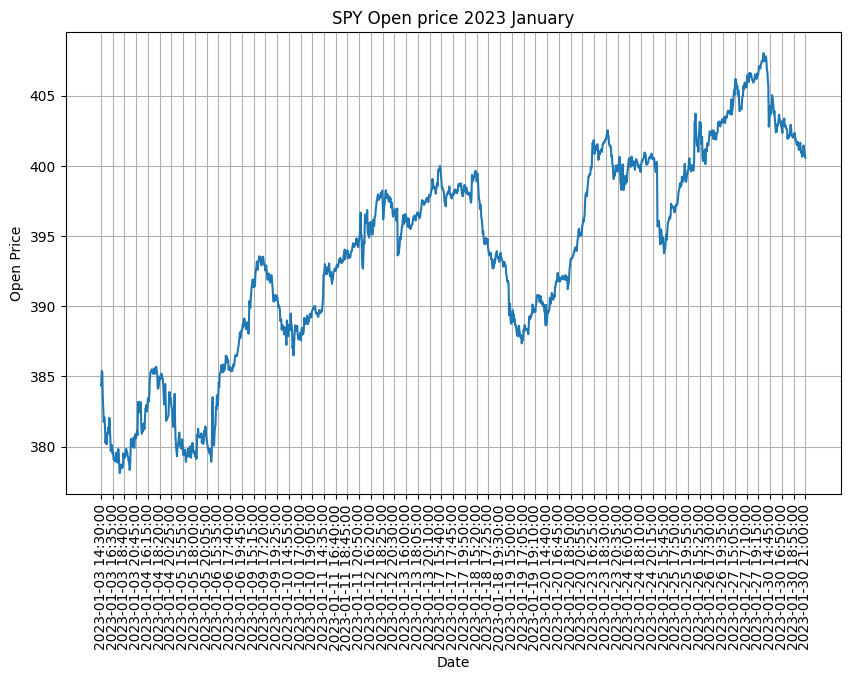

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_2023_1_day_intervals = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 2023.csv")

df_2023_1_day_intervals.set_index('Datetime', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_2023_1_day_intervals['Open'])
plt.title('SPY Open price 2023')
plt.xlabel('Date')
plt.xticks(df_2023_1_day_intervals.index[::5], rotation=90)  # Show one in every five dates and rotate the labels by 45 degrees
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

df_2023_1_hour_intervals = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 2023.csv")
df_2023_1_hour_intervals.set_index('Datetime', inplace=True)

start_date = '2023-01-01'
end_date = '2023-03-31'
subset_df = df_2023_1_hour_intervals[start_date:end_date]

plt.figure(figsize=(10, 6))
plt.plot(subset_df['Open'])
plt.title('SPY Open price 2023 January to March')
plt.xlabel('Date')
plt.xticks(subset_df.index[::10], rotation=90)  # Show one in every ten dates and rotate the labels by 45 degrees
plt.ylabel('Open Price')
plt.grid(True)
plt.show()


df_2023_5_min_intervals = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2023.csv")
df_2023_5_min_intervals.set_index('Datetime', inplace=True)

start_date = '2023-01-01'
end_date = '2023-01-31'
subset_df = df_2023_5_min_intervals[start_date:end_date]

plt.figure(figsize=(10, 6))
plt.plot(subset_df['Open'])
plt.title('SPY Open price 2023 January')
plt.xlabel('Date')
plt.xticks(subset_df.index[::25], rotation=90)  # Show one in every tweny five dates and rotate the labels by 45 degrees
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

Than we will add Volume to the graph

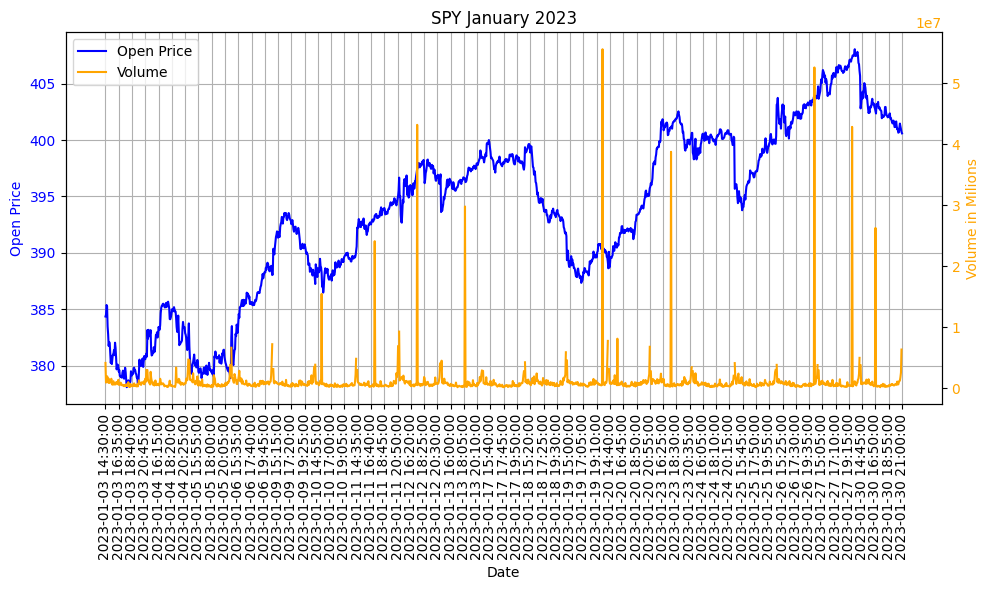

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_2023_5_min_intervals = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2023.csv")
df_2023_5_min_intervals.set_index('Datetime', inplace=True)

start_date = '2023-01-01'
end_date = '2023-01-31'
subset_df = df_2023_5_min_intervals[start_date:end_date]

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first variable (e.g., Open price) on the left axis
ax1.plot(subset_df.index, subset_df['Open'], color='blue', label='Open Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Open Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

plt.xticks(subset_df.index[::25], rotation=90)

# Create a secondary y-axis on the right side for the second variable (e.g., Volume)
ax2 = ax1.twinx()
ax2.plot(subset_df.index, subset_df['Volume'], color='orange', label='Volume')
ax2.set_ylabel('Volume in Milions', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('SPY January 2023')
plt.tight_layout()
plt.show()


From looking at the Graph we can see an upward trend in the open price additionally, there are spikes in the volume mostly around the beginning of the trading day.

In [ ]:
import pandas as pd
# aggragating the data from 2021, 2022, 2023, 2024 to a single file

df_2021_5_min = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2021.csv")
df_2022_5_min = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2022.csv")
df_2023_5_min = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 2023.csv")
df_2024_5_min = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 1-1-2024 23-03-2024.csv")

combined_df_2023_5_min = pd.concat([df_2021_5_min, df_2022_5_min, df_2023_5_min, df_2024_5_min], ignore_index=True)

combined_df_2023_5_min.to_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 5-min 01.01.2021-23.03.2024.csv")


df_2021_1_hour = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 2021.csv")
df_2022_1_hour = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 2022.csv")
df_2023_1_hour = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 2023.csv")
df_2024_1_hour = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 1-1-2024 23-03-2024.csv")

combined_df_2023_1_hour = pd.concat([df_2021_1_hour, df_2022_1_hour, df_2023_1_hour, df_2024_1_hour], ignore_index=True)

combined_df_2023_1_hour.to_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 01.01.2021-23.03.2024.csv")


df_2021_1_day = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 2021.csv")
df_2022_1_day = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 2022.csv")
df_2023_1_day = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 2023.csv")
df_2024_1_day = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 1-1-2024 23-03-2024.csv")

combined_df_2023_1_day = pd.concat([df_2021_1_day, df_2022_1_day, df_2023_1_day, df_2024_1_day], ignore_index=True)

combined_df_2023_1_day.to_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 01.01.2021-23.03.2024.csv")

#Seasonal Decompose
To better understand the nature of the data I will use the seasonal_decompose function from the statsmodels library.

seasonal_decompose is decomposing the time series data into three main components:

**Trend**: The trend component represents the long-term progression of the time series data. It captures the underlying pattern that may be increasing, decreasing, or constant over time, excluding short-term fluctuations and seasonal effects.
Understanding the trend is crucial for prediction because it gives us the long-term general direction the data is going in.

**Seasonal**: The seasonal component captures the repeating short-term patterns in the time series. These are regular fluctuations that occur at a consistent frequency due to seasonal factors, such as temperature changes over the months or sales increases during holidays. Capturing the seasonal behavior of the data is important, because when we make a prediction if we are right before a seasonal fluctuation it may change our prediction value.

**Residual**: The residual component is what remains after removing the trend and seasonal components from the original time series. It represents the random noise or any unexpected variations in the data that are not explained by the trend or seasonal components.

The residual helps us understand how much noise there is in the data. In general, the more noise in the data the harder it is to accurately predict it.

After extracting these 3 components from the raw data we can better understand the nature of the data, and choose models types accordingly.

Text(0.5, 0.98, 'Volume daily data in 22 days seasonal period')

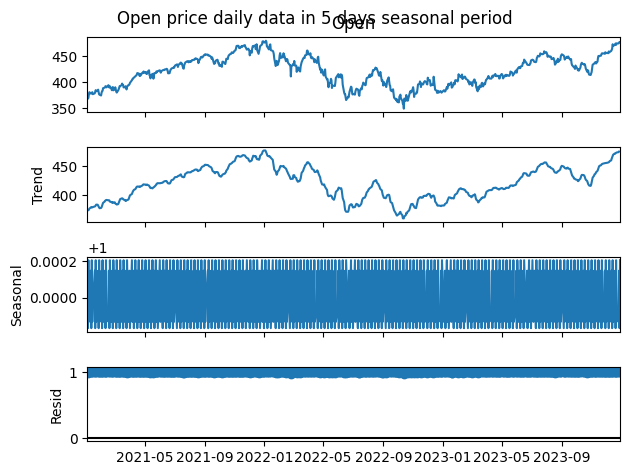

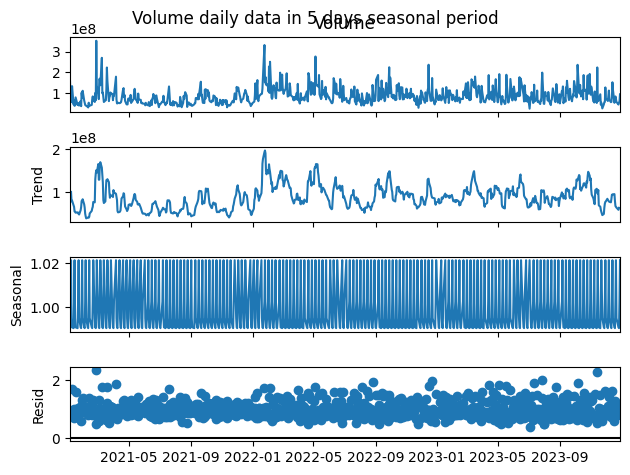

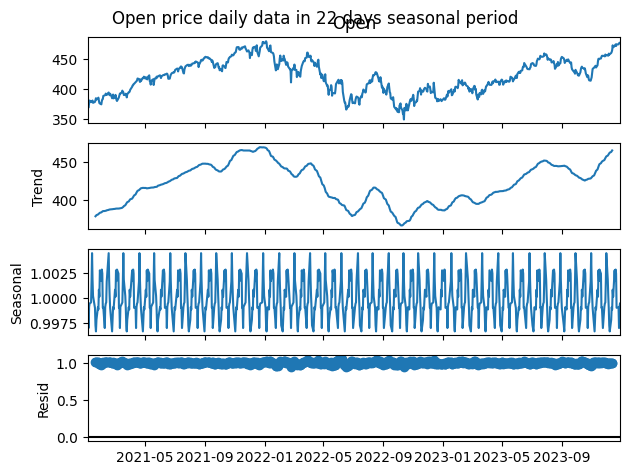

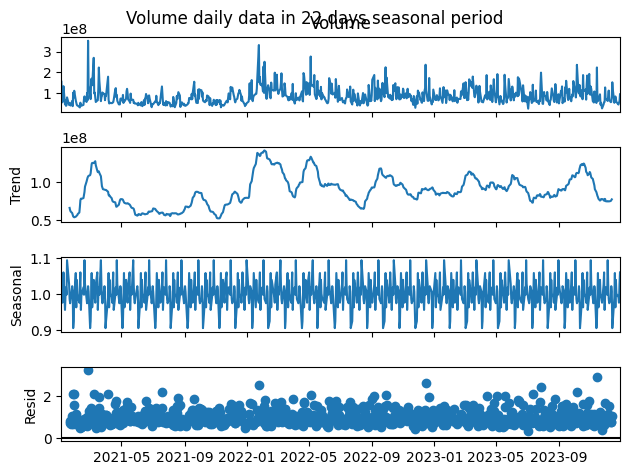

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

spy_2021_to_2023_1_day = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 2021-2023.csv")
spy_2021_to_2023_1_day['Datetime'] = pd.to_datetime(spy_2021_to_2023_1_day['Datetime'])
# Set the 'Date' column as the index
spy_2021_to_2023_1_day.set_index('Datetime', inplace=True)

weekly_seasonality = seasonal_decompose(spy_2021_to_2023_1_day['Open'], model='multiplicative', period=5) # there are 5 trading days in a week
weekly_fig = weekly_seasonality.plot()
weekly_fig.suptitle('Open price daily data in 5 days seasonal period (2021-2023)')

weekly_seasonality = seasonal_decompose(spy_2021_to_2023_1_day['Volume'], model='multiplicative', period=5) # there are 5 trading days in a week
weekly_fig = weekly_seasonality.plot()
weekly_fig.suptitle('Volume daily data in 5 days seasonal period (2021-2023)')

montly_seasonality = seasonal_decompose(spy_2021_to_2023_1_day['Open'], model='multiplicative', period=22) # there are about 22 traiding days in a month
monthly_fig =  montly_seasonality.plot()
monthly_fig.suptitle('Open price daily data in 22 days seasonal period (2021-2023)')

montly_seasonality = seasonal_decompose(spy_2021_to_2023_1_day['Volume'], model='multiplicative', period=22) # there are about 22 traiding days in a month
monthly_fig =  montly_seasonality.plot()
monthly_fig.suptitle('Volume daily data in 22 days seasonal period (2021-2023)')

From the resulting plots of the daily intervals data we can infer the following:

**Weekly seasonal period:** In this resolution it seems there is no obvious trend, seasonality, or residual/noise.

**Monthly seasonal period:** It seems there is no trend in the open price and volume, but there seems to be a seasonality in the open price and volume indicating there is some repeating accourance on a monthly basis, The residual/noise seems pretty random.

From these results, we can assume that either there is no simple statistical model that can explain the stock behavior, or the data period we chose to look at is exceptional.

Now we will examine for daily deasonality

Text(0.5, 0.98, 'Volume hourly data in 7 hours seasonal period (2023)')

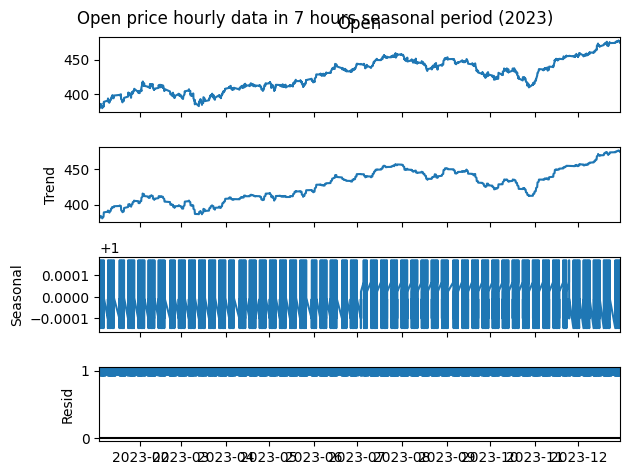

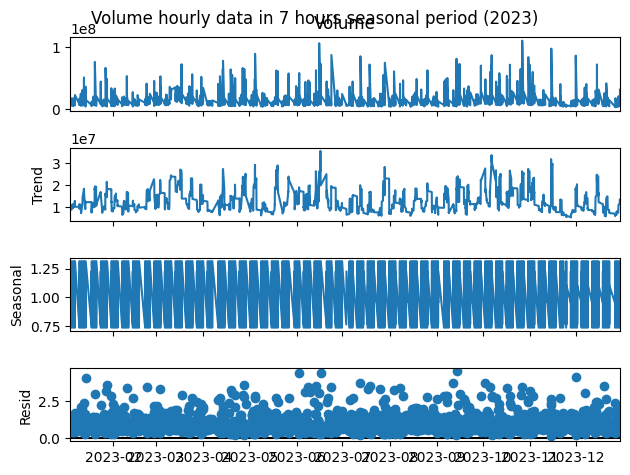

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

spy_2023_1_hour = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 2023.csv")
spy_2023_1_hour['Datetime'] = pd.to_datetime(spy_2023_1_hour['Datetime'])
# Set the 'Date' column as the index
spy_2023_1_hour.set_index('Datetime', inplace=True)

daily_seasonality = seasonal_decompose(spy_2023_1_hour['Open'], model='multiplicative', period=7) # there are 7 trading hours in a day
daily_fig = daily_seasonality.plot()
daily_fig.suptitle('Open price hourly data in 7 hours seasonal period (2023)')

daily_seasonality = seasonal_decompose(spy_2023_1_hour['Volume'], model='multiplicative', period=7) # there are 7 trading hours in a day
daily_fig = daily_seasonality.plot()
daily_fig.suptitle('Volume hourly data in 7 hours seasonal period (2023)')

From this plots we can see that there is an upward trend when looking on the price of the SPY at 2023, the volume seasonaly plot tells us there is a daily seasonality (we can see a very repepetive cycle with big value differences) it happends because most of the trades is being made in the beginning of the day and in the end of the day.

#Autocorrelation
Autocorrelation, also known as serial correlation, is a measure of the similarity between a time series and a lagged version of itself over successive time intervals. If the autocorrelation is closer to 1 (positive autocorrelation) it means that there is a strong connection between high past values with present values, Negative autocorrelation means that low past values may imply high present values.

I will use the plot_acf function from the statmodels library to calculate and plot the time series auto-corralation.

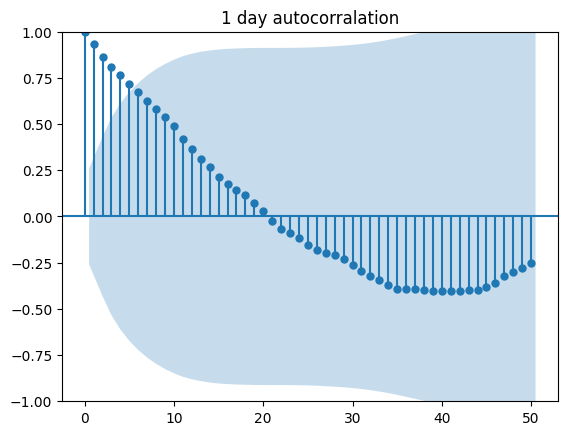

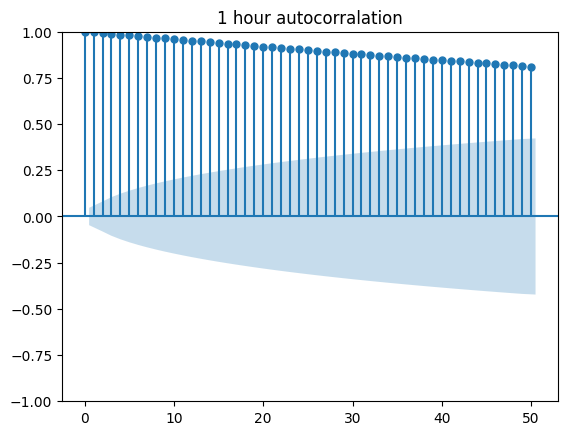

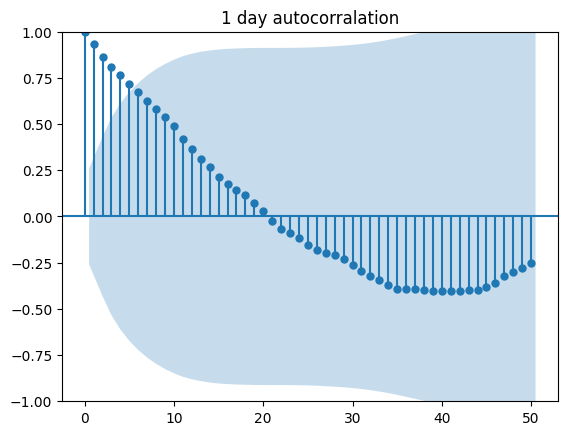

In [ ]:
import pandas as pd
!pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf

spy_2023_1_hour = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 2023.csv")
open_price_1_hour = spy_2023_1_hour['Open']

spy_1_day = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-day 1-1-2024 23-03-2024.csv")
open_price_1_day = spy_1_day['Open']

plot_acf(open_price_1_hour, title='1 hour autocorralation', lags=50)
plot_acf(open_price_1_day, title='1 day autocorralation', lags=50)


From the plotted autocorrelation we can infer interesting things:

From looking at the daily autocorrelation we can see that close high past values (1-5 days back) may imply high present values, But further back the autocorrelation flips, and above 20 days back (lags) high stock prices may imply lower prest values.

That makes sense because if the stock is currently high it is likely that it will stay high in the next couple of days with no big changes, but high stock prices are prone to temporarily go down in the next weeks because people maybe made money from the rise of the stock price or think the stock is overpriced and want to sell, which cause the stock price to go down.

From looking at the hourly autocorrelation we can infer that high stock prices correlate to high stock prices in the next hours, that makes sense because the S&P 500 doesn't move much in dozens of hours.

# Forcasting
Our goal is to forecast in the beginning of a trading day the price of the SPY at the end of the trading day (close price).

To do so we will examine different time-series models and compare their performances.

We will use a 85-15 split between training data and evaluating data, since the data set is all the trading data in 2021-2023 and we had 753 trading days we will randomly select 113 trading days for evaluation of the models and the rest of the days will be for training purposes.

# Choosing the training and evaluating days
We will choose about 10%-15% of the data to be for evaluating the model, since we have 810 trading days data we will choose the last 100 trading days for evaluation (about 12% of the data will be for evaluating the model).
That leaves us with 710 trading days to train the model.

#ARIMA model
first I will use classical time series models from the ARIMA family, this family of models uses classical statistical linear calculation to predict time series future values.

These family of models composed of the following components:

**AR (Autoregression) -** The autoregression part uses regression for prediction, in simple words based on the past N values it tries to create a function that matches these values and hopefully matches future values as well.

**MA (Moving Average -)** The moving average of this family of models is a bit different than the regular moving average, instead of calculating the moving average of the time series values, it calculates the moving average of the past prediction errors and create a linear combination of those errors in order to predict future values.

That may sound counter-intuitive, but there is a logic behind it. Your model may have a seasonality or other pattern in the error of the model. The moving average is a method to capture this pattern without even having to identify where it comes from, and help estimate the error that will be generated in the current prediction and correct the prediction accordingly.

**I (Integrated) -** The integrated part of the models responsible for differencing the time series, The process of differencing involves subtracting the previous observation from the current observation to remove trends or seasonality and make the time series stationary. This process is repeated as needed until stationarity is achieved.

It is crucial to achieve stationary time series without trend and seasonality, Because Autoreggression and Moving Average work well only on stationary data without trend or seasonality.

By combining all the components above we get the ARIMA model which first makes the data stationary and then uses the Autoregerssion and Moving Average to predict future values, I will use the ARIMA class from the statsmodels library.


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=21538.129, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=21537.318, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=21537.411, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=21537.577, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=21536.138, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=21537.240, Time=0.57 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=21535.597, Time=0.33 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=21536.730, Time=0.78 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=21536.645, Time=0.71 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=3.20 sec
 ARIMA(3,1,0)(0,0,0)[7] intercept   : AIC=21533.214, Time=0.40 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=21534.421, Time=1.04 sec
 ARIMA(3,1,0)(0,0,1)[7] intercept   :

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


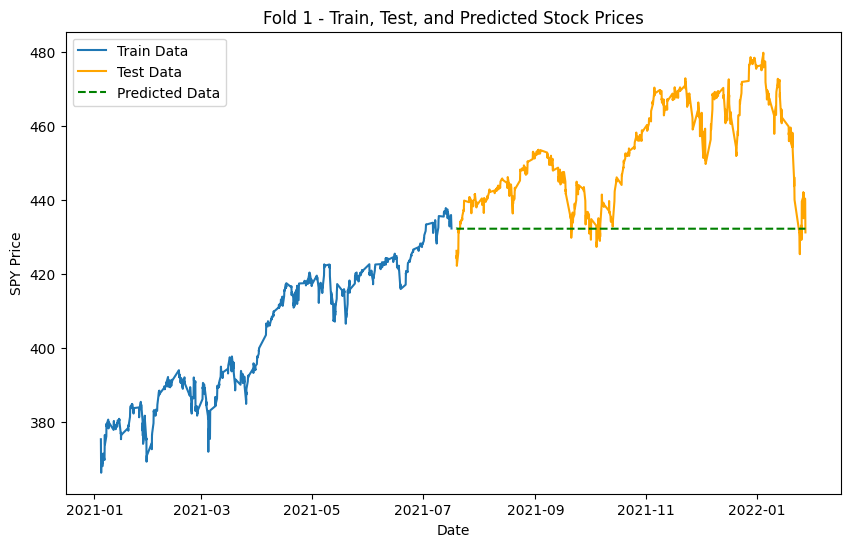

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Fold MAPE with ARIMA(4, 1, 0): 5.99%


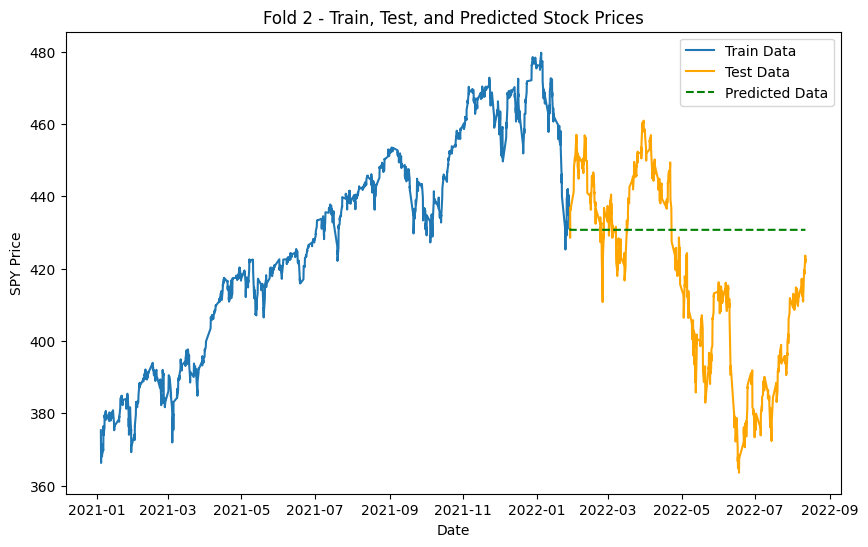

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Fold MAPE with ARIMA(4, 1, 0): 8.00%


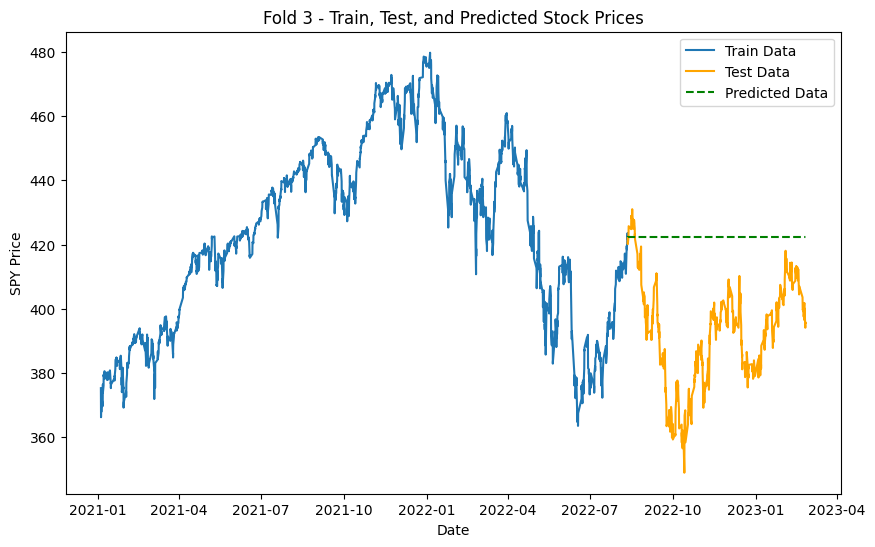

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Fold MAPE with ARIMA(4, 1, 0): 6.87%


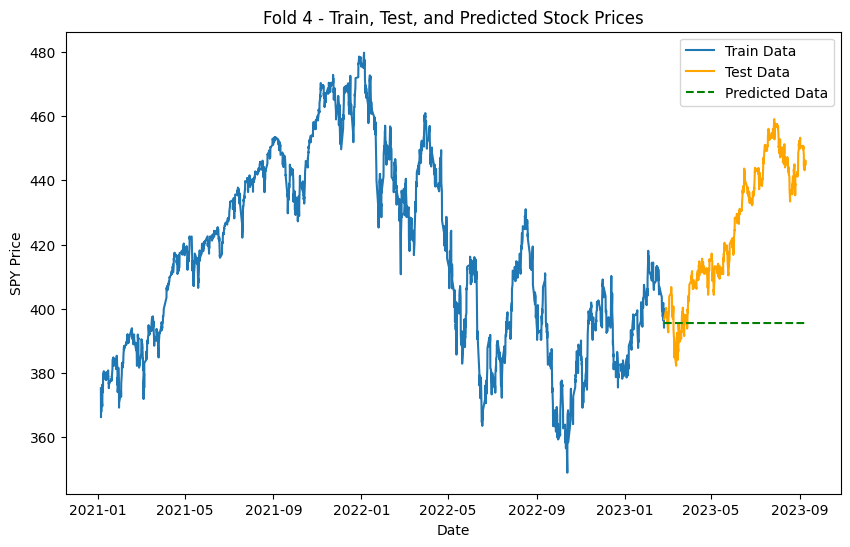

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Fold MAPE with ARIMA(4, 1, 0): 6.28%


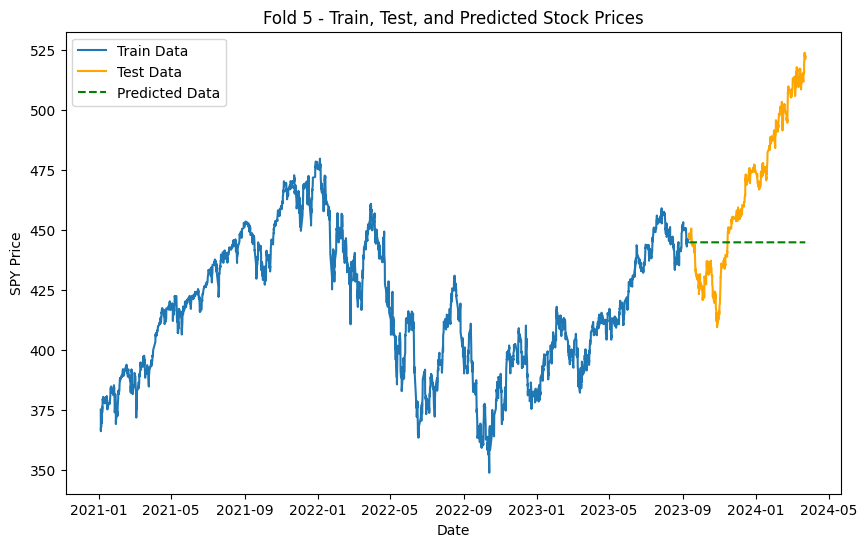


Overall MAPE for the model with parameters (4, 1, 0): 6.32%


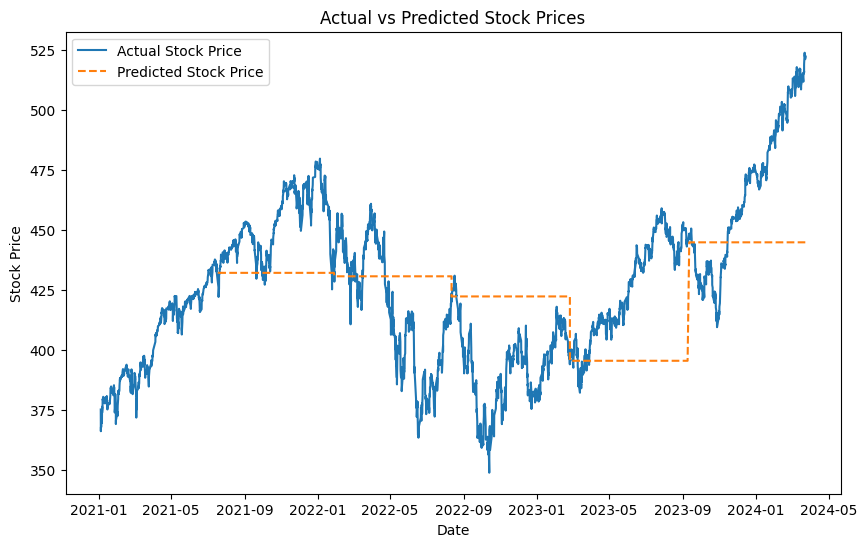

In [ ]:
!pip install statsmodels
!pip install pmdarima
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Loading the data
historical_data = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 01.01.2021-23.03.2024.csv")
historical_data['Datetime'] = pd.to_datetime(historical_data['Datetime'])
historical_data.set_index('Datetime', inplace=True)

series = historical_data['Open']

# Use auto_arima to find the best ARIMA parameters for the entire dataset
best_model = auto_arima(series,
                        seasonal=True,        # Set to True if you want SARIMA
                        m=7,                  # Seasonal period (7 trading hours in a day)
                        stepwise=True,        # Stepwise search to reduce computation
                        error_action='ignore',# Ignore errors to avoid break
                        suppress_warnings=True,
                        trace=True,           # Show the process of fitting
                        max_p=5,              # Set reasonable range for p
                        max_q=5,              # Set reasonable range for q
                        max_d=2,              # Set reasonable range for d
                        n_jobs=-1)            # Utilize all cores

# Get the best parameters
best_order = best_model.order
best_seasonal_order = best_model.seasonal_order

# Time Series Cross-Validation (TSCV)
tscv = TimeSeriesSplit(n_splits=5)

predictions = []
actuals = []

for fold, (train_index, test_index) in enumerate(tscv.split(series), 1):
    train, test = series.iloc[train_index], series.iloc[test_index]

    # Fit SARIMA model with the best parameters on each training set
    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)  # Use SARIMA with best parameters
    model_fit = model.fit(disp=False)

    forecast = model_fit.forecast(steps=len(test))

    # Save predictions and actual values
    predictions.extend(forecast)
    actuals.extend(test)

    # Evaluate the model performance using MAPE
    mape = mean_absolute_percentage_error(test, forecast)
    print(f'Fold MAPE with ARIMA{best_order}: {mape:.2f}%')

    # Plotting the train, test, and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train Data')
    plt.plot(test.index, test, label='Test Data', color='orange')
    plt.plot(test.index, forecast, label='Predicted Data', color='green', linestyle='--')
    plt.title(f'Fold {fold} - Train, Test, and Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('SPY Price')
    plt.legend()
    plt.show()

# Overall model evaluation
overall_mape = mean_absolute_percentage_error(actuals, predictions)
print(f'\nOverall MAPE for the model with parameters {best_order}: {overall_mape:.2f}%')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Actual Stock Price')
plt.plot(series.index[len(series) - len(predictions):], predictions, label='Predicted Stock Price', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

As we can see SARIMA doesn't give a good prediction for the SPY stock prices (we can see it gives a constant values prediction), With overall MAPE of 6.32%.

This doesn't suprise me because the ARIMA models family assumes linear reletionship between past values and future values, but stock prices are a complex mix of non-linear, volatile, and sometimes random factors that ARIMA family models are not well-suited to handle.

# LSTM

Long Short-Term Memory (LSTM) is a type of artificial recurrent neural network (RNN) architecture used in the field of deep learning.

LSTM is disigned to handle and learn from sequiential data, making them particularly well-suited for time-series forecasting, LSTM is better than regular RNN in a way that it can capture further a way in the past values and relay on them in there prediction, for those resone I will use LSTM to predict the SPY stock price based on past prices.


I will use stateful LSTM because our different data points are related to each other (they are part of one big sequence).

**Choosing the training and evaluating days** - I will choose about 10%-15% of the data to be for evaluating the model.
We have 810 trading days data, we want to have sufficient past data for each day we try to forecast so we will start training with at least 100 trading days,
That leaves us with 710 days that we can try to forecast, I will choose the last 100 trading days as our evaluating days, which leaves us with 610 trading days, I will skip the first 10 trading days because we want to have number of training days and evaluating days that have common divisor (the batch size).

**Batch Size** - I will use a batch of size 50 because we have 600 trading days for training and 100 evaluating days so 50 divided that perfectly and it is considered an optimal batch size.

I won't use TSCV for validetion with LSTM because the batch size doesn't always match TSCV folds sizes.

I will develop, train, and test different LSTM models with different hyperparameters and will see which gives the best predictions.

In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential

def get_model_mean_predictions(sequence_length: int,
                               number_of_layers: int,
                               units_per_layer: int,
                               optimizer: str,
                               number_of_epochs: int = 10):
  #creating the input-output pairs for training and evaluating the
  first_training_day = datetime.datetime(2021, 6, 11, 0, 0, 0)
  first_evaluating_day = datetime.datetime(2023, 10, 30, 0, 0, 0)

  historical_data = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 01.01.2021-23.03.2024.csv")
  historical_data['Datetime'] = pd.to_datetime(historical_data['Datetime'])

  # Scale the features
  scaler = MinMaxScaler()
  historical_data[['High', 'Low', 'Volume']] = scaler.fit_transform(historical_data[['High', 'Low', 'Volume']])
  historical_data[['Close']] = scaler.fit_transform(historical_data[['Close']])

  # Prepare input-output pairs for training and testing
  train_input_squences, train_output_squences, test_input_squences, test_output_squences = [], [], [], []
  for index, row in historical_data.iterrows():
    # getting only the first timestep of each training/evaluating day
    if row['Datetime'] < first_training_day or row['Datetime'].date() == historical_data.iloc[index-1]['Datetime'].date():
      continue

    i = 0
    while index + i + 1 < len(historical_data):
      if historical_data.iloc[index + i]['Datetime'].date() < historical_data.iloc[index + i + 1]['Datetime'].date():
        last_timestep_of_current_day = historical_data.iloc[index + i]
        break
      i += 1

    current_input_squences = historical_data[['High', 'Low', 'Volume']].iloc[index+1 - sequence_length:index+1].values
    predictaed_close_price = last_timestep_of_current_day['Close']

    if row['Datetime'] < first_evaluating_day:
      train_input_squences.append(current_input_squences)
      train_output_squences.append(predictaed_close_price)
    else:
      test_input_squences.append(current_input_squences)
      test_output_squences.append(predictaed_close_price)

  train_input_squences = np.array(train_input_squences)
  train_output_squences = np.array(train_output_squences)
  test_input_squences = np.array(test_input_squences)
  test_output_squences = np.array(test_output_squences)


  # create the LSTM model
  model = Sequential()
  if number_of_layers == 1:
    model.add(LSTM(
        units=units_per_layer,
        batch_input_shape=(50, train_input_squences.shape[1], train_input_squences.shape[2]),
        activation='tanh',
        stateful=True))
  else:
    for i in range(number_of_layers - 1):
      if i == 0: # adding the first input layer
        model.add(LSTM(units=units_per_layer,
        batch_input_shape=(50, train_input_squences.shape[1], train_input_squences.shape[2]),
        activation='tanh',
        stateful=True,
        return_sequences=True))
      else:
        model.add(LSTM(units=units_per_layer,
        activation='tanh',
        stateful=True,
        return_sequences=True))
    # adding the last input layer
    model.add(LSTM(units=units_per_layer,
    activation='tanh',
    stateful=True))

  model.add(Dense(1)) # set the output layer

  # compile the model
  model.compile(optimizer=optimizer, loss='mse')

  # train the model
  model.fit(train_input_squences,
            train_output_squences,
            epochs=number_of_epochs,
            batch_size=50,
            verbose=0,
            shuffle=False)

  # Evaluate the model
  predictions = model.predict(test_input_squences, batch_size=50)
  corrected_predictions = scaler.inverse_transform(predictions)
  # print(corrected_predictions)
  mean_absolute_percentage_error = np.mean(np.abs((predictions - test_output_squences) / test_output_squences)) * 100
  print(f"sequence_length:{sequence_length}, number of layers:{number_of_layers}, units per layer:{units_per_layer}, epochs:{number_of_epochs}, Mean Absolute Percentage Error:{mean_absolute_percentage_error}")

  return mean_percentage_difference

# modifing the number of layers
get_model_mean_predictions(sequence_length=300, number_of_layers=1, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=2, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=4, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=5, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=6, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=7, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=8, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=9, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=10, units_per_layer=50, optimizer='adam')
print()

# modifing the number of units per layer
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=10, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=20, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=30, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=40, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=60, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=70, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=80, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=90, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=100, optimizer='adam')
print()

# modifing the sequence_length
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=100, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=200, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=300, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=400, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=500, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=600, number_of_layers=3, units_per_layer=50, optimizer='adam')
get_model_mean_predictions(sequence_length=700, number_of_layers=3, units_per_layer=50, optimizer='adam')
print()

# modifing the number of epochs
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=5)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=10)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=15)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=20)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=25)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=30)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=35)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=40)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=45)
get_model_mean_predictions(sequence_length=50, number_of_layers=3, units_per_layer=50, optimizer='adam', number_of_epochs=50)
print()

2/2 [==============================] - 1s 58ms/step
sequence_length:300, number of layers:3, units per layer:10, epochs:10, Mean Percentage Difference:22.472517556661597
2/2 [==============================] - 1s 26ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:5, Mean Percentage Difference:24.66890195027452
2/2 [==============================] - 1s 24ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:10, Mean Percentage Difference:24.34074779963166


2/2 [==============================] - 1s 29ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:15, Mean Percentage Difference:24.034493369598273


2/2 [==============================] - 1s 22ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:20, Mean Percentage Difference:23.740335391084912
2/2 [==============================] - 1s 26ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:25, Mean Percentage Difference:23.969240766010625
2/2 [==============================] - 2s 27ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:30, Mean Percentage Difference:23.77292913506531
2/2 [==============================] - 1s 29ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:35, Mean Percentage Difference:23.82925733665281
2/2 [==============================] - 1s 26ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:40, Mean Percentage Difference:23.58681402705719
2/2 [==============================] - 1s 28ms/step
sequence_length:50, number of layers:3, units per layer:50, epochs:45, Mean Percentage Difference:24.10578

# Conclusion
**Number of layaers:**

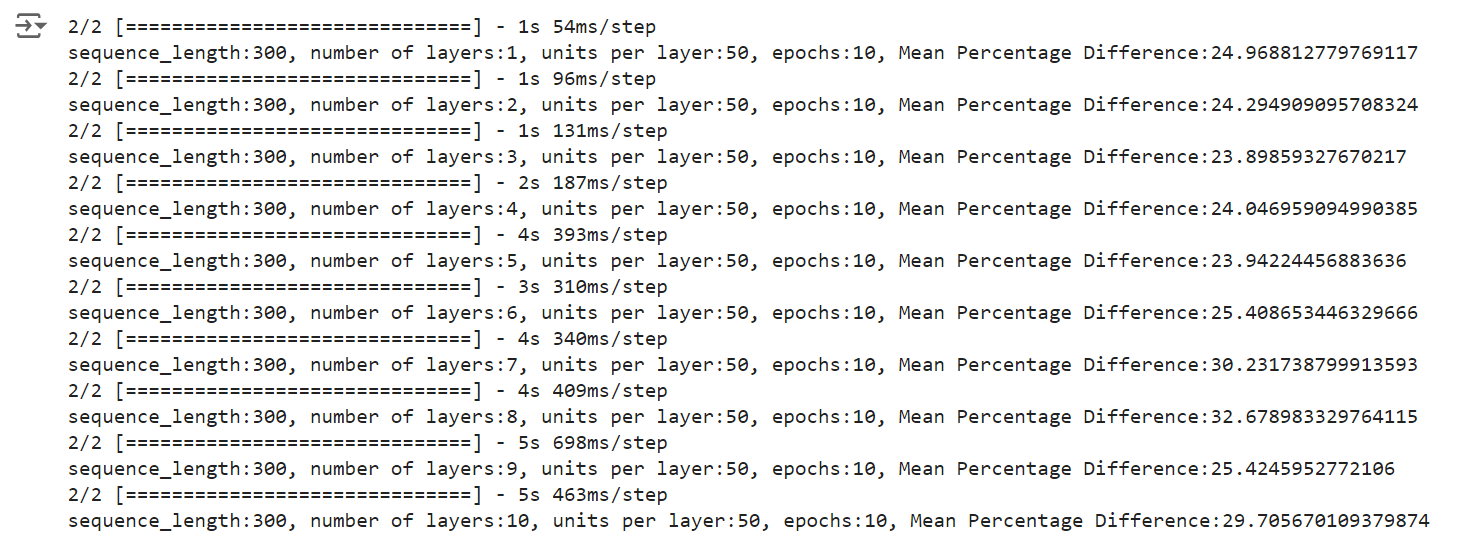

As we can see in contrast to the expectation, when you stuck more layers you don't necessarily get a better model.
We can see that the best/most efficient number of layers is surprisingly 2.

**Number of unit per layer**
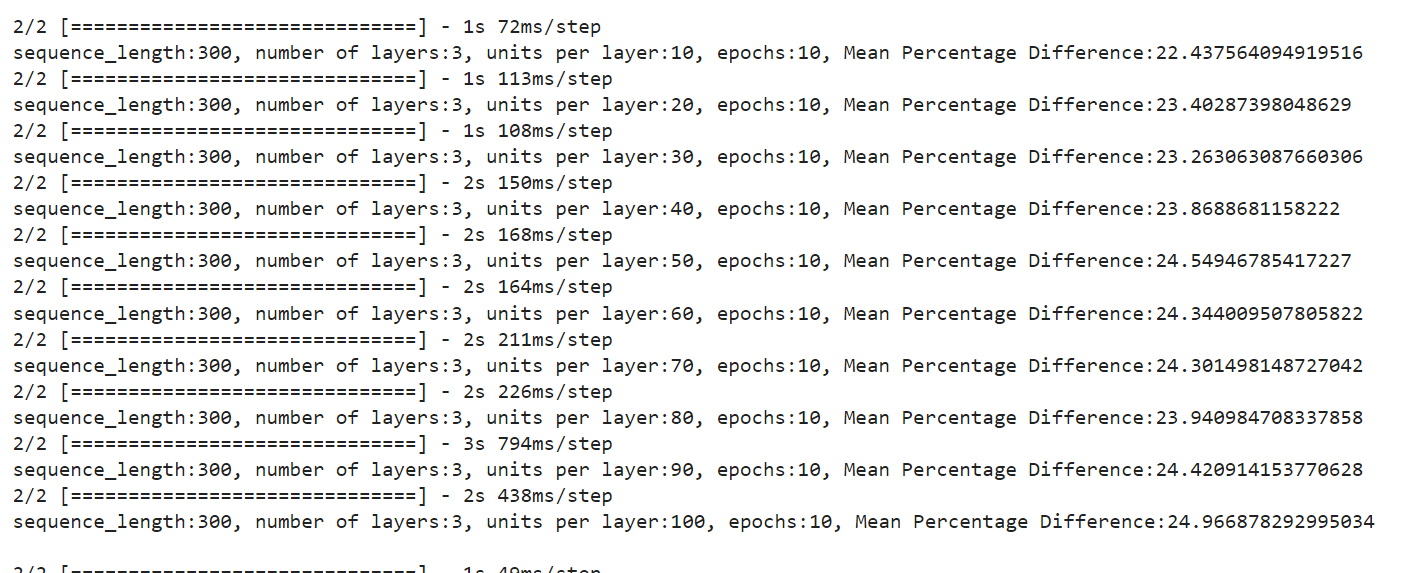
Also here we can see that in contrast to the expectation, fewer units per layer gives better forecasting, with 10 units per layer with the best score.

**Sequence length**
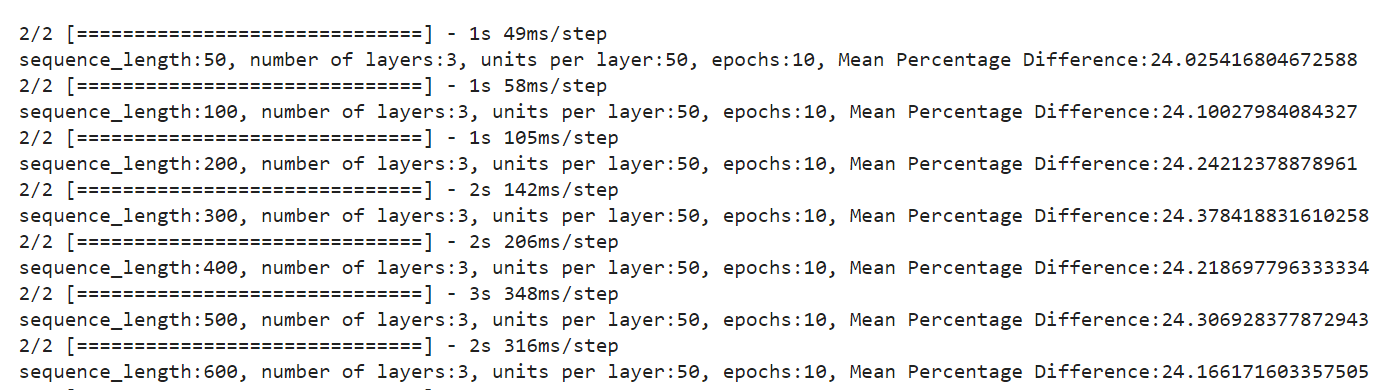
Here we can see that with different sequence lengths, we get pretty much the same result, quite surprising.

**Number of epochs**
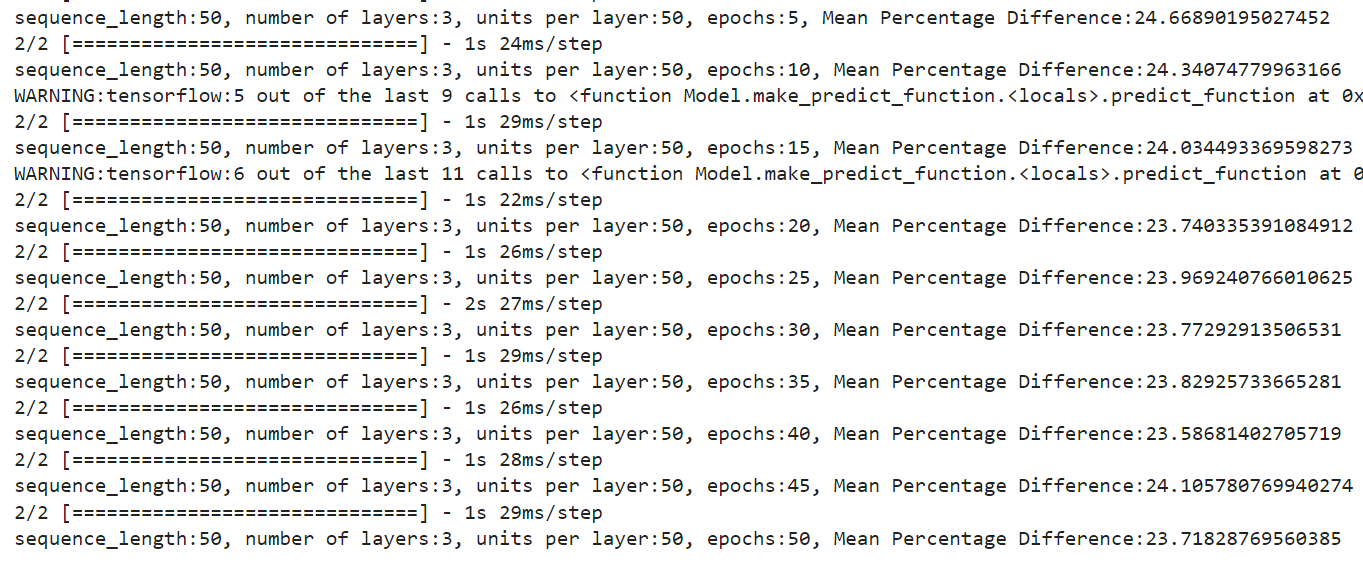
Epoches means training iterations over the data set, if you have too little the model won't be able to learn to predict, if you have too much the model learns to predict only the training data (overfitting).
In our case, we can see we get a minor improvement with more epochs, the best at 20 epochs.

# Finding the best hyperparameters

In order to find the best training Hyper-parameters i will use RandomizedSearchCV from scikit-learn that try differente Hyper-parameters in a parametrs area that i set and give back the one which gave the best predictions.

In [ ]:
# we have to use version 2.12.0 of tensorflow so all the imports will work
# !pip uninstall tensorflow
# !pip install tensorflow==2.12.0

import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


# Define the function to create the model
def create_model(sequence_length=50, number_of_layers=1, units_per_layer=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()

    if number_of_layers == 1:
        model.add(LSTM(
            units=units_per_layer,
            batch_input_shape=(50, sequence_length, 3),
            activation='tanh',
            stateful=True))
        model.add(Dropout(dropout_rate))
    else:
        for i in range(number_of_layers - 1):
            if i == 0:  # first input layer
                model.add(LSTM(units=units_per_layer,
                               batch_input_shape=(50, sequence_length, 3),
                               activation='tanh',
                               stateful=True,
                               return_sequences=True))
            else:
                model.add(LSTM(units=units_per_layer,
                               activation='tanh',
                               stateful=True,
                               return_sequences=True))
            model.add(Dropout(dropout_rate))
        # last input layer
        model.add(LSTM(units=units_per_layer,
                       activation='tanh',
                       stateful=True))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # output layer

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# Function to prepare the data
def prepare_data(sequence_length):
    first_training_day = datetime.datetime(2021, 6, 11, 0, 0, 0)
    first_evaluating_day = datetime.datetime(2023, 10, 30, 0, 0, 0)

    historical_data = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 01.01.2021-23.03.2024.csv")
    historical_data['Datetime'] = pd.to_datetime(historical_data['Datetime'])

    # Scale the features
    scaler = MinMaxScaler()
    historical_data[['High', 'Low', 'Volume']] = scaler.fit_transform(historical_data[['High', 'Low', 'Volume']])
    historical_data[['Close']] = scaler.fit_transform(historical_data[['Close']])

    # Prepare input-output pairs for training and testing
    train_input_sequences, train_output_sequences, test_input_sequences, test_output_sequences = [], [], [], []
    for index, row in historical_data.iterrows():
        # Getting only the first timestep of each training/evaluating day
        if row['Datetime'] < first_training_day or row['Datetime'].date() == historical_data.iloc[index-1]['Datetime'].date():
            continue

        i = 0
        while index + i + 1 < len(historical_data):
            if historical_data.iloc[index + i]['Datetime'].date() < historical_data.iloc[index + i + 1]['Datetime'].date():
                last_timestep_of_current_day = historical_data.iloc[index + i]
                break
            i += 1

        current_input_sequences = historical_data[['High', 'Low', 'Volume']].iloc[index+1 - sequence_length:index+1].values
        predicted_close_price = last_timestep_of_current_day['Close']

        if row['Datetime'] < first_evaluating_day:
            train_input_sequences.append(current_input_sequences)
            train_output_sequences.append(predicted_close_price)
        else:
            test_input_sequences.append(current_input_sequences)
            test_output_sequences.append(predicted_close_price)

    train_input_sequences = np.array(train_input_sequences)
    train_output_sequences = np.array(train_output_sequences)
    test_input_sequences = np.array(test_input_sequences)
    test_output_sequences = np.array(test_output_sequences)

    return train_input_sequences, train_output_sequences, test_input_sequences, test_output_sequences, scaler

# Define the model with KerasRegressor
def model_fn(sequence_length, number_of_layers, units_per_layer, learning_rate, dropout_rate):
    model = KerasRegressor(build_fn=create_model,
                           sequence_length=sequence_length,
                           number_of_layers=number_of_layers,
                           units_per_layer=units_per_layer,
                           learning_rate=learning_rate,
                           dropout_rate=dropout_rate,
                           batch_size=50,
                           epochs=10,
                           verbose=0,
                           shuffle=False)
    return model

# Prepare the data
sequence_length = 50  # Starting value, will be overwritten by RandomizedSearchCV
train_input_sequences, train_output_sequences, test_input_sequences, test_output_sequences, scaler = prepare_data(sequence_length)

# Define the parameter grid
param_dist = {
    'sequence_length': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700],
    'number_of_layers': [1, 2, 3, 4, 5],
    'units_per_layer': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'epochs': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
}

# Use RandomizedSearchCV to find the best hyperparameters
model = model_fn(sequence_length, 1, 50, 0.001, 0.2)  # initial dummy parameters

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV
random_search_result = random_search.fit(train_input_sequences, train_output_sequences)

# Print the best parameters and best score
print("Best Parameters: ", random_search_result.best_params_)
print("Best Score: ", random_search_result.best_score_)

# Evaluate the model with the best parameters on the test set
best_model = random_search_result.best_estimator_
predictions = best_model.predict(test_input_sequences, batch_size=50)
corrected_predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
mean_percentage_difference = np.mean(np.abs((corrected_predictions - scaler.inverse_transform(test_output_sequences.reshape(-1, 1))) / scaler.inverse_transform(test_output_sequences.reshape(-1, 1)))) * 100
print(f"Mean Percentage Difference: {mean_percentage_difference}")

all_dates = his
plt.figure(figsize=(14, 7))
plt.plot(all_dates, all_actual_prices, label='Actual Stock Prices', color='blue')


Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-1-83cf91bee3a3>:100: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model,
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the 

Best Parameters:  {'units_per_layer': 120, 'sequence_length': 50, 'number_of_layers': 2, 'learning_rate': 0.01, 'epochs': 25, 'dropout_rate': 0.5}
Best Score:  -0.0012187411775812507
Mean Percentage Difference: 2.2099788830502196


**Best hyper-parameters**

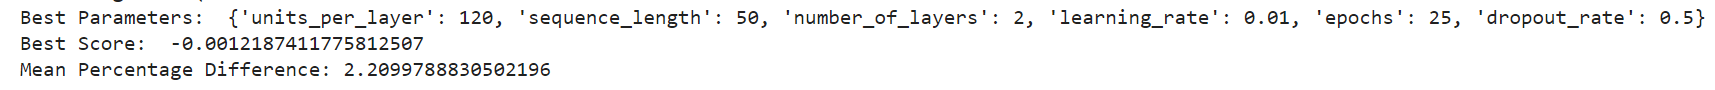
After using RandomizedSearchCV which randomly searches through a hyper-parameters range I set, it came up with a surprisingly good combination (that I wouldn't think we be a good combination) that is far better than when I tried to tweak each parameter manually (when I tried it the mean percentage error was between 25-22, now the model that RandomizedSearchCV found has a mean percentage error of 2.2!).
We can learn that using algorithms that suit your goal can help you get far better results in less time.

#Using the best hyper-parameters

Epoch 1/25
12/12 [==============================] - 4s 99ms/step - loss: 0.2493
Epoch 2/25
12/12 [==============================] - 1s 100ms/step - loss: 0.0235
Epoch 3/25
12/12 [==============================] - 1s 93ms/step - loss: 0.0253
Epoch 4/25
12/12 [==============================] - 1s 94ms/step - loss: 0.0131
Epoch 5/25
12/12 [==============================] - 1s 92ms/step - loss: 0.0066
Epoch 6/25
12/12 [==============================] - 1s 92ms/step - loss: 0.0054
Epoch 7/25
12/12 [==============================] - 1s 93ms/step - loss: 0.0042
Epoch 8/25
12/12 [==============================] - 1s 93ms/step - loss: 0.0046
Epoch 9/25
12/12 [==============================] - 1s 93ms/step - loss: 0.0037
Epoch 10/25
12/12 [==============================] - 1s 93ms/step - loss: 0.0037
Epoch 11/25
12/12 [==============================] - 1s 99ms/step - loss: 0.0041
Epoch 12/25
12/12 [==============================] - 1s 99ms/step - loss: 0.0040
Epoch 13/25
12/12 [=================

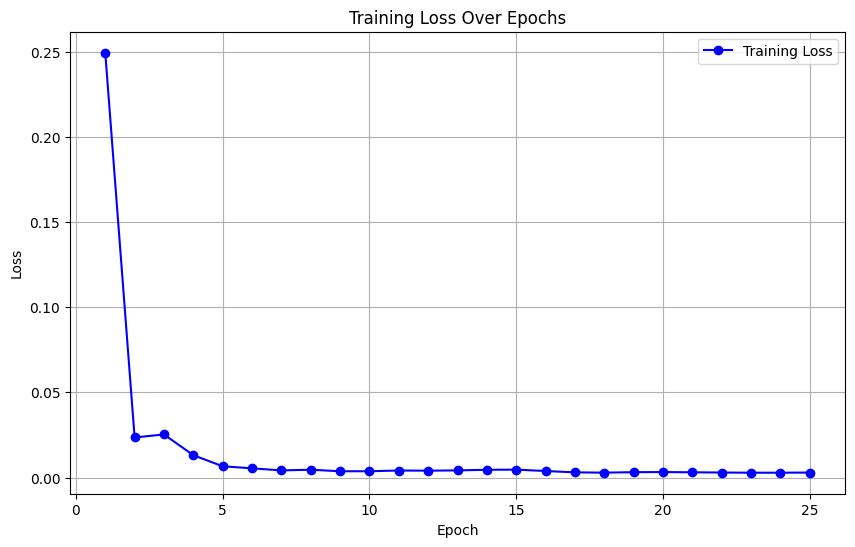

2/2 [==============================] - 1s 43ms/step


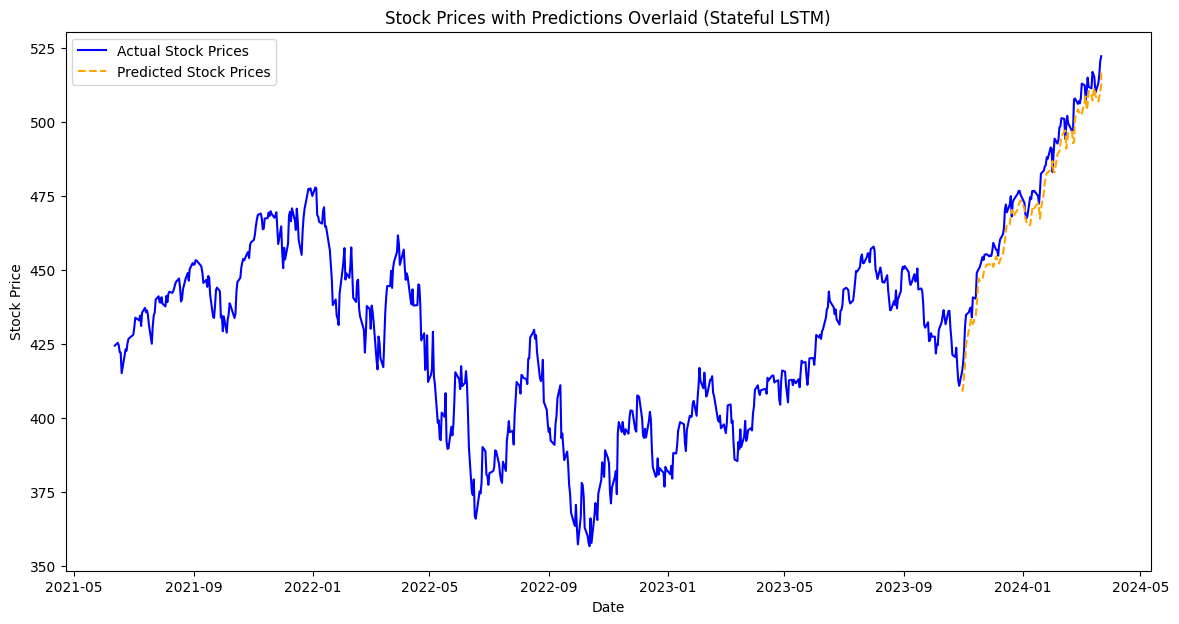

In [ ]:
!pip install tensorflow==2.12.0 # need to use this tensorflow version inorder for the code to work

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

best_params = {
                'sequence_length': 50,
                'number_of_layers': 2,
                'units_per_layer': 120,
                'learning_rate': 0.01,
                'dropout_rate': 0.5,
                'epochs': 25,
              }

historical_data = pd.read_csv("/content/drive/MyDrive/Dor/The Open University/Data Science Project/stocks historical data/SPY/SPY data 1-hour 01.01.2021-23.03.2024.csv")

def prepare_data(sequence_length):
    first_training_day = datetime.datetime(2021, 6, 11, 0, 0, 0)
    first_evaluating_day = datetime.datetime(2023, 10, 30, 0, 0, 0)

    historical_data['Datetime'] = pd.to_datetime(historical_data['Datetime'])

    # Scale the features
    scaler = MinMaxScaler()
    historical_data[['High', 'Low', 'Volume']] = scaler.fit_transform(historical_data[['High', 'Low', 'Volume']])
    historical_data[['Close']] = scaler.fit_transform(historical_data[['Close']])

    # Prepare input-output pairs for training and testing
    train_input_sequences, train_output_sequences, test_input_sequences, test_output_sequences = [], [], [], []
    train_dates, test_dates = [], []  # Store dates for training and testing sequences
    for index, row in historical_data.iterrows():
        # Getting only the first timestep of each training/evaluating day
        if row['Datetime'] < first_training_day or row['Datetime'].date() == historical_data.iloc[index-1]['Datetime'].date():
            continue

        i = 0
        while index + i + 1 < len(historical_data):
            if historical_data.iloc[index + i]['Datetime'].date() < historical_data.iloc[index + i + 1]['Datetime'].date():
                last_timestep_of_current_day = historical_data.iloc[index + i]
                break
            i += 1

        current_input_sequences = historical_data[['High', 'Low', 'Volume']].iloc[index+1 - sequence_length:index+1].values
        predicted_close_price = last_timestep_of_current_day['Close']

        if row['Datetime'] < first_evaluating_day:
            train_input_sequences.append(current_input_sequences)
            train_output_sequences.append(predicted_close_price)
            train_dates.append(last_timestep_of_current_day['Datetime'])  # Add corresponding date
        else:
            test_input_sequences.append(current_input_sequences)
            test_output_sequences.append(predicted_close_price)
            test_dates.append(last_timestep_of_current_day['Datetime'])  # Add corresponding date

    train_input_sequences = np.array(train_input_sequences)
    train_output_sequences = np.array(train_output_sequences)
    test_input_sequences = np.array(test_input_sequences)
    test_output_sequences = np.array(test_output_sequences)

    return train_input_sequences, train_output_sequences, test_input_sequences, test_output_sequences, scaler, train_dates, test_dates


# Define a function to create a stateful LSTM model using the best hyperparameters
def create_stateful_model(sequence_length, number_of_layers, units_per_layer, learning_rate, dropout_rate):
    model = Sequential()

    if number_of_layers == 1:
        model.add(LSTM(
            units=units_per_layer,
            batch_input_shape=(50, sequence_length, 3),  # Keep the batch size same for stateful LSTM
            activation='tanh',
            stateful=True))  # Set stateful to True
        model.add(Dropout(dropout_rate))
    else:
        for i in range(number_of_layers - 1):
            if i == 0:  # first input layer
                model.add(LSTM(units=units_per_layer,
                               batch_input_shape=(50, sequence_length, 3),
                               activation='tanh',
                               stateful=True,
                               return_sequences=True))
            else:
                model.add(LSTM(units=units_per_layer,
                               activation='tanh',
                               stateful=True,
                               return_sequences=True))
            model.add(Dropout(dropout_rate))
        # last input layer
        model.add(LSTM(units=units_per_layer,
                       activation='tanh',
                       stateful=True))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # output layer

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# Recreate the best stateful LSTM model
stateful_model = create_stateful_model(
    sequence_length=best_params['sequence_length'],
    number_of_layers=best_params['number_of_layers'],
    units_per_layer=best_params['units_per_layer'],
    learning_rate=best_params['learning_rate'],
    dropout_rate=best_params['dropout_rate']
)

# Prepare the data for stateful LSTM
train_input_sequences, train_output_sequences, test_input_sequences, test_output_sequences, scaler, train_dates, test_dates = prepare_data(best_params['sequence_length'])

# Train the stateful model
training_date = stateful_model.fit(train_input_sequences, train_output_sequences, batch_size=50, epochs=best_params['epochs'], verbose=1, shuffle=False)
loss_values = training_date.history['loss']

# Plot the loss values over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, best_params['epochs'] + 1), loss_values, marker='o', linestyle='-', color='b', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the test set
predictions = stateful_model.predict(test_input_sequences, batch_size=50)

# Inverse transform the actual outputs and predictions to get back to the original scale
actual_prices_train = scaler.inverse_transform(train_output_sequences.reshape(-1, 1))
actual_prices_test = scaler.inverse_transform(test_output_sequences.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))

# Combine all actual prices (train + test) for plotting
all_actual_prices = np.concatenate((actual_prices_train, actual_prices_test), axis=0).flatten()

# Create a placeholder for all predictions (same length as all_actual_prices)
all_predicted_prices = np.full(all_actual_prices.shape, np.nan)
# Place the predictions in the corresponding location
all_predicted_prices[-len(predicted_prices):] = predicted_prices.flatten()

# Combine all dates for plotting
all_dates = train_dates + test_dates

# Plotting the stock prices
plt.figure(figsize=(14, 7))
plt.plot(all_dates, all_actual_prices, label='Actual Stock Prices', color='blue')
plt.plot(all_dates, all_predicted_prices, label='Predicted Stock Prices', color='orange', linestyle='dashed')
plt.title('Stock Prices with Predictions Overlaid (Stateful LSTM)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#Model performance
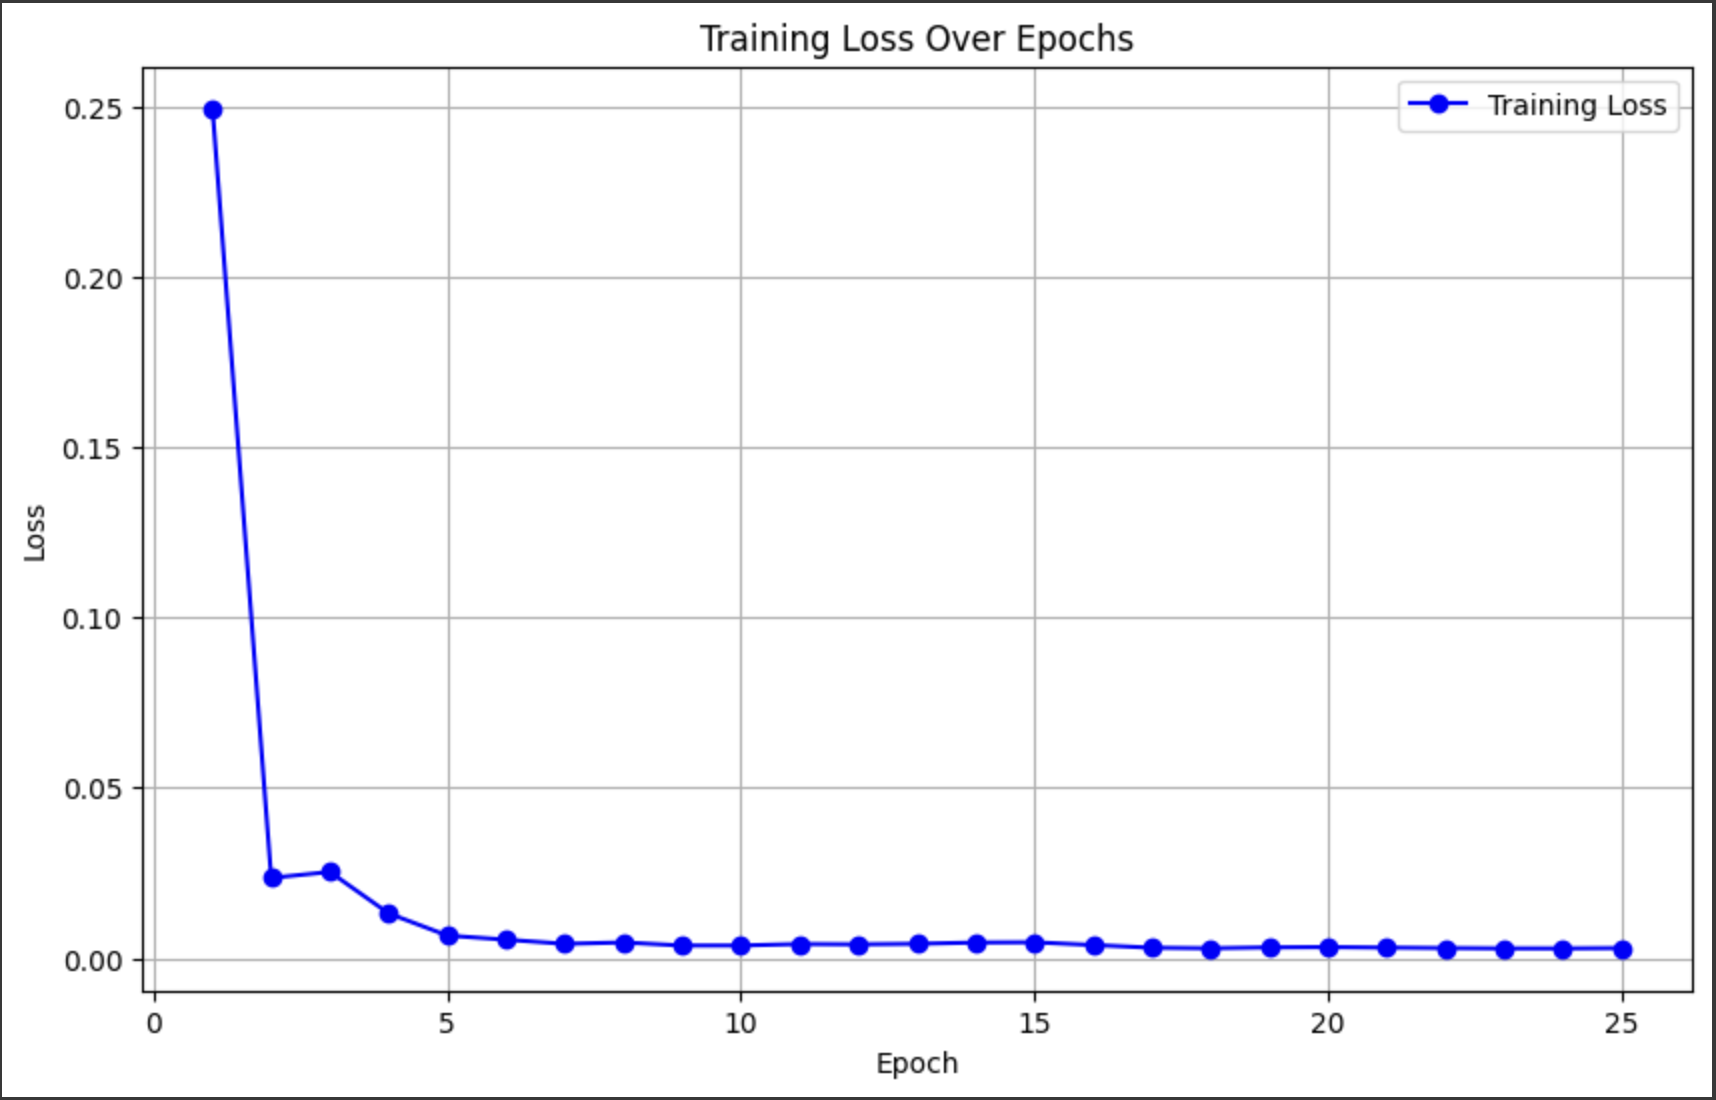


We can see in training that from iteration to iteration the loss function drop significantly from around 0.5 to around 0.003, which means the models predictions are getting more accurate.

#Conclusion

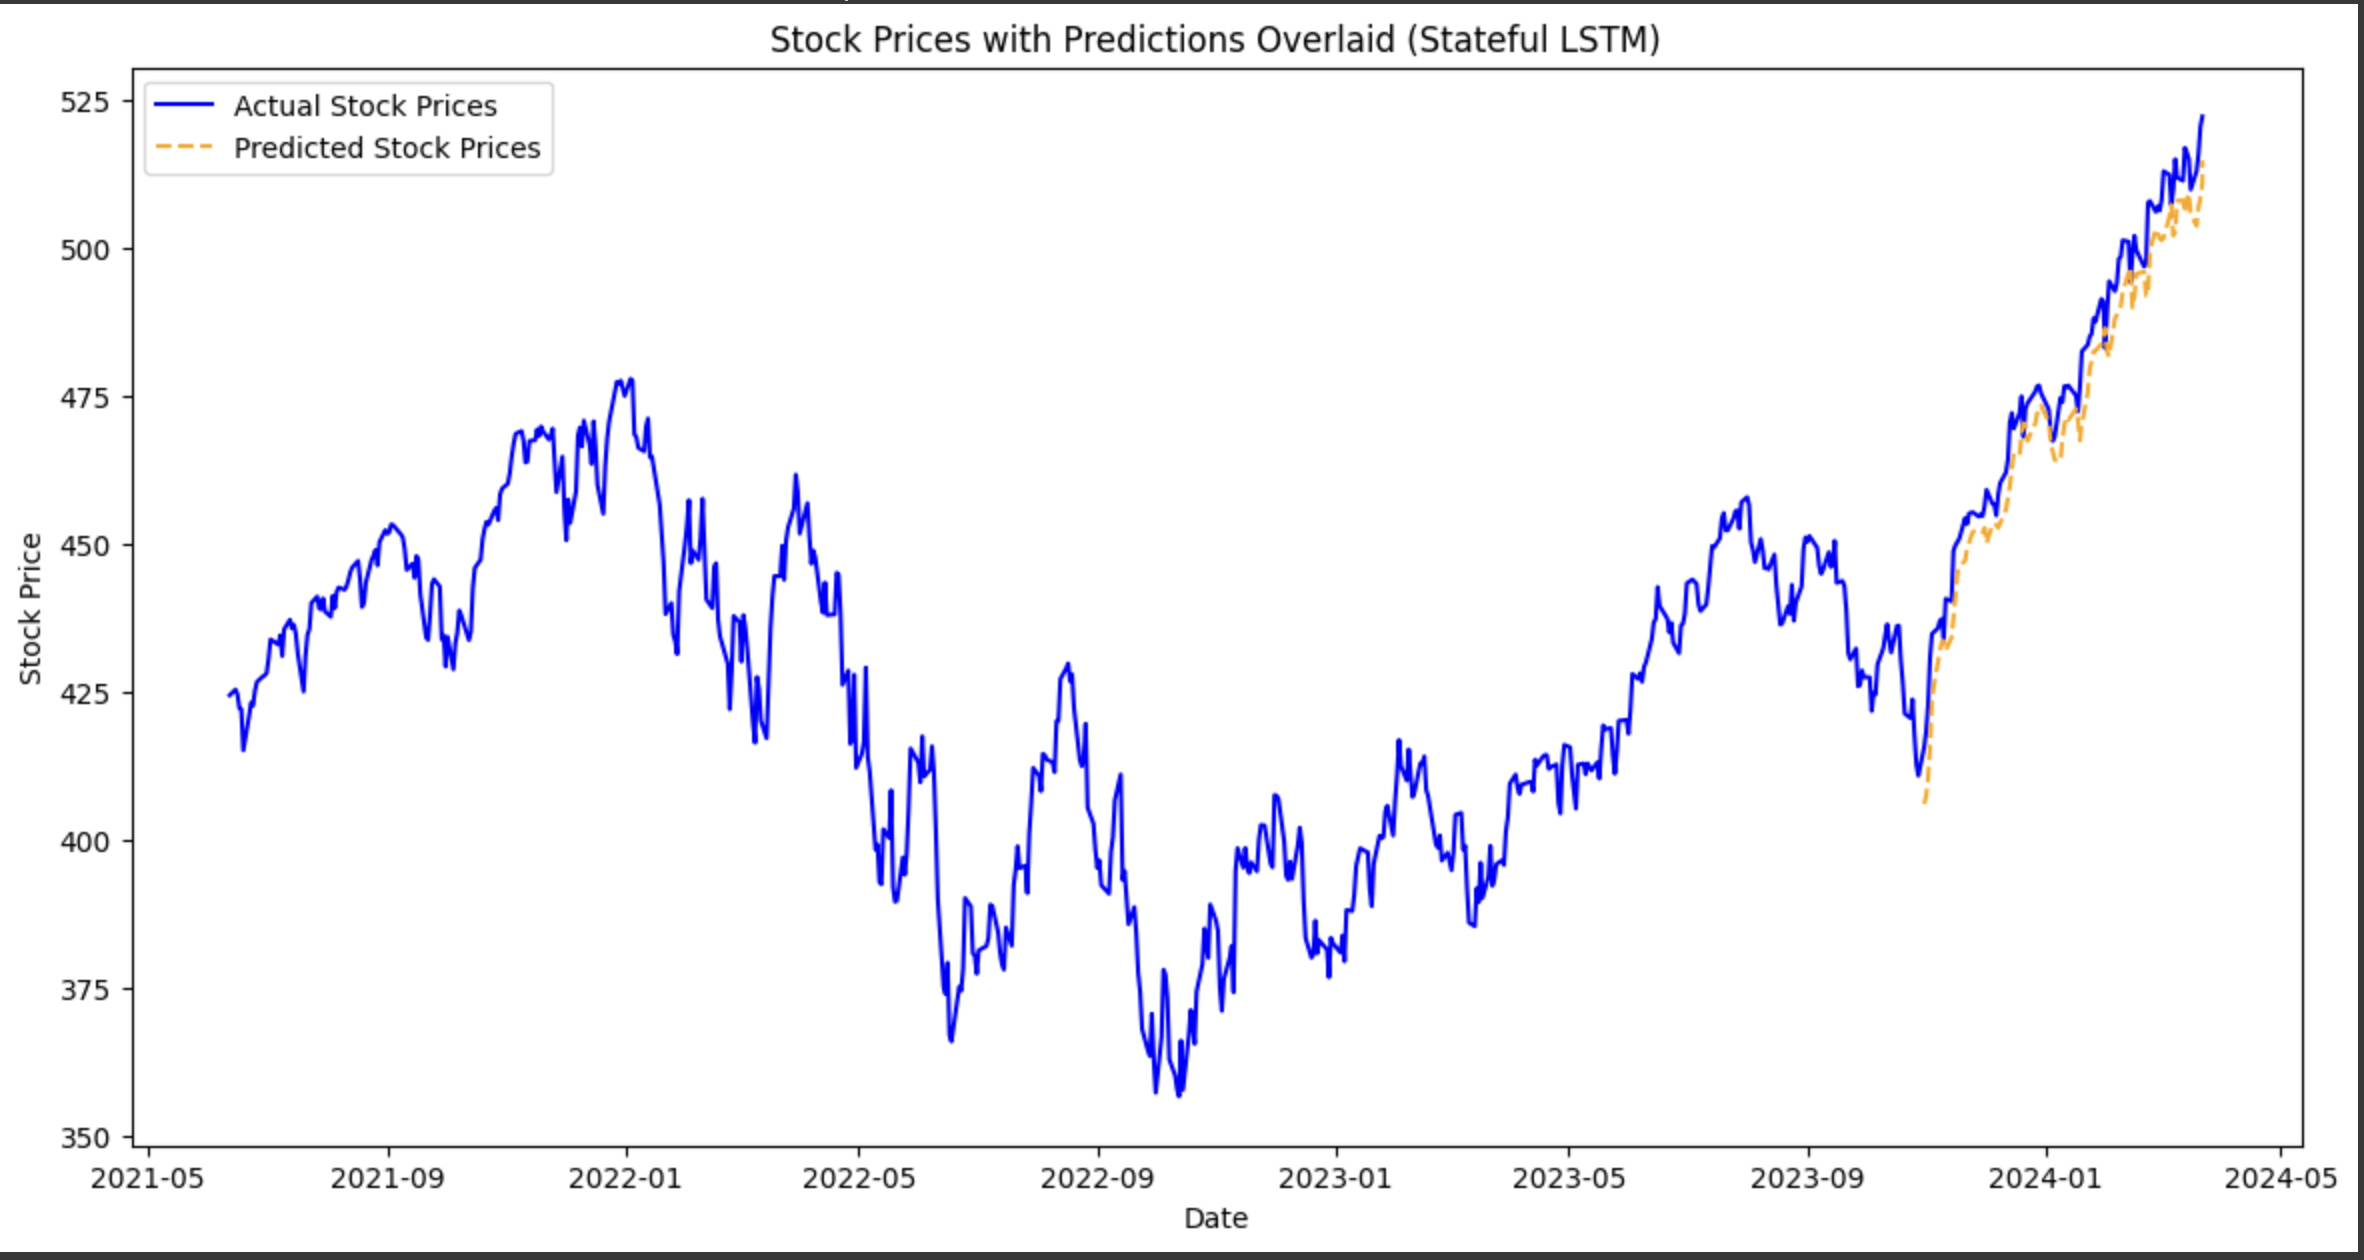


LSTM gives far better perdictions for stock prices compared to SARIMA, that's not suprising because stock price are very complicated and are infulanced by a lot of fectors and have fluctuations, so a linear statistical model like SARIMA doesn't fit in that case.


SARIMA has a MAPE of 6.32%, While our LSTM has a MAPE of 2.2%.
A big improvment.

We can see from the graph that the LSTM model with the best hyper-parameters we found earlier gives a pretty good prediction for the SPY close prices.

It would be interesting to use the model in real life every trading day automatically in a trading platform and see if that can be profitable over time, but this is beyond the scope of this project.